In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import skew
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('AgeGroupDetails.csv')

In [3]:
df

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [4]:
df['Percentage'] = df['Percentage'].str.replace('%', '')

In [5]:
df['Percentage']=df['Percentage'].astype('float64')

In [6]:
df.drop('Sno', axis=1, inplace=True)

In [7]:
df

,AgeGroup,TotalCases,Percentage
0,0-9,22,3.18
1,10-19,27,3.90
2,20-29,172,24.86
3,30-39,146,21.10
4,40-49,112,16.18
5,50-59,77,11.13
6,60-69,89,12.86
7,70-79,28,4.05
8,>=80,10,1.45
9,Missing,9,1.30


In [8]:
age = df['AgeGroup']
cases = df['TotalCases']

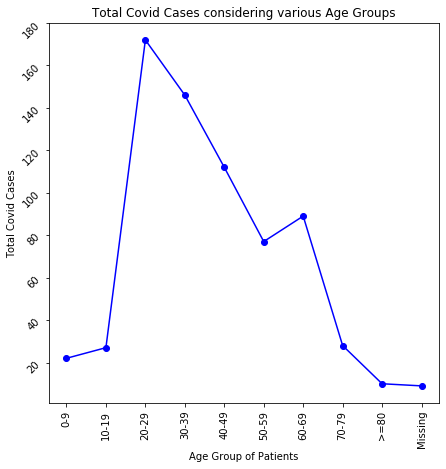

In [9]:
plt.figure(figsize=(7,7))
plt.plot(age, cases, 'bo-')
plt.xlabel("Age Group of Patients")
plt.ylabel("Total Covid Cases")
plt.title("Total Covid Cases considering various Age Groups")
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

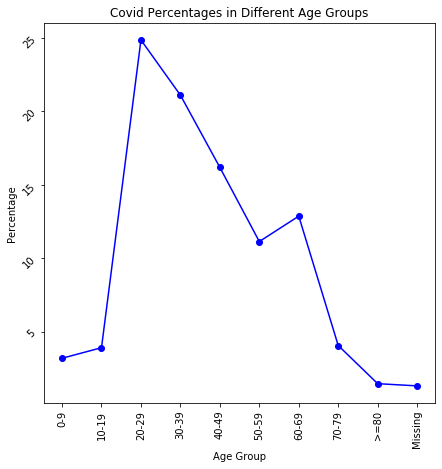

In [10]:
ages = df['AgeGroup']
percent = df['Percentage']

plt.figure(figsize=(7,7))
plt.plot(ages,percent,'bo-')
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Covid Percentages in Different Age Groups")
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

In [11]:
df1 = pd.read_csv('HospitalBedsIndia.csv')

In [12]:
df1.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     float64
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     object 
 4   NumSubDistrictHospitals_HMIS      30 non-null     object 
 5   NumDistrictHospitals_HMIS         37 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     object 
 7   NumPublicBeds_HMIS                37 non-null     object 
 8   NumRuralHospitals_NHP18           37 non-null     float64
 9   NumRuralBeds_NHP18                37 non-null     float64
 10  NumUrbanHospitals_NHP18           37 non-null     float64
 11  NumUrbanBeds_NHP18                37 non-null     float64
 12  Unnamed: 1

In [14]:
df1.drop('Sno', axis=1, inplace=True)
df1.drop('Unnamed: 12', axis=1, inplace=True)
df1.drop('Unnamed: 13', axis=1, inplace=True)

In [15]:
df1['State/UT'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'All India', nan], dtype=object)

In [16]:
df1['State/UT'].fillna('All India',inplace=True)

In [17]:
df1['NumPrimaryHealthCenters_HMIS'].unique()

array(['27', '1417', '122', '1007', '2007', '40', '813', '9', '4', '534',
       '31', '1770', '500', '516', '702', '343', '2547', '933', '1420',
       '2638', '87', '138', '65', '134', '1360', '521', '2463', '25',
       '1854', '788', '114', '3277', '275', '1374', '29,899', nan],
      dtype=object)

In [18]:
df1['NumPrimaryHealthCenters_HMIS'] = df1['NumPrimaryHealthCenters_HMIS'].str.replace('29,899', '29899')

In [19]:
df1['NumPrimaryHealthCenters_HMIS']=df1['NumPrimaryHealthCenters_HMIS'].astype('float64')
df1['NumPrimaryHealthCenters_HMIS'].fillna(df1['NumPrimaryHealthCenters_HMIS'].mean(), inplace=True)
df1['NumPrimaryHealthCenters_HMIS']=df1['NumPrimaryHealthCenters_HMIS'].astype('int64')

In [20]:
df1['NumCommunityHealthCenters_HMIS'].unique()

array(['4', '198', '62', '166', '63', '2', '25', '385', '131', '79', '87',
       '179', '207', '229', '3', '324', '430', '17', '29', '10', '21',
       '377', '146', '579', '82', '22', '671', '69', '406', '5,568', nan],
      dtype=object)

In [21]:
df1['NumCommunityHealthCenters_HMIS'] = df1['NumCommunityHealthCenters_HMIS'].str.replace('5,568', '5568')

In [22]:
df1['NumCommunityHealthCenters_HMIS']=df1['NumCommunityHealthCenters_HMIS'].astype('float64')
df1['NumCommunityHealthCenters_HMIS'].fillna(df1['NumCommunityHealthCenters_HMIS'].mean(), inplace=True)
df1['NumCommunityHealthCenters_HMIS']=df1['NumCommunityHealthCenters_HMIS'].astype('int64')

In [23]:
df1['NumSubDistrictHospitals_HMIS'].unique()

array([nan, '31', '14', '33', '1', '12', '9', '2', '44', '24', '61', '13',
       '147', '82', '72', '101', '3', '27', '5', '47', '64', '310', '19',
       '70', '1,255'], dtype=object)

In [24]:
df1['NumSubDistrictHospitals_HMIS'] = df1['NumSubDistrictHospitals_HMIS'].str.replace('1,255', '1255')

In [25]:
df1['NumSubDistrictHospitals_HMIS']=df1['NumSubDistrictHospitals_HMIS'].astype('float64')
df1['NumSubDistrictHospitals_HMIS'].fillna(df1['NumSubDistrictHospitals_HMIS'].mean(), inplace=True)
df1['NumSubDistrictHospitals_HMIS']=df1['NumSubDistrictHospitals_HMIS'].astype('int64')

In [26]:
df1['NumDistrictHospitals_HMIS'].unique()

array(['3', '20', '15', '33', '43', '4', '32', '1', '2', '47', '37', '28',
       '29', '23', '42', '53', '51', '70', '9', '13', '11', '35', '174',
       '55', '1,003', nan], dtype=object)

In [27]:
df1['NumDistrictHospitals_HMIS'] = df1['NumDistrictHospitals_HMIS'].str.replace('1,003', '1003')

In [28]:
df1['NumDistrictHospitals_HMIS']=df1['NumDistrictHospitals_HMIS'].astype('float64')
df1['NumDistrictHospitals_HMIS'].fillna(df1['NumDistrictHospitals_HMIS'].mean(), inplace=True)
df1['NumDistrictHospitals_HMIS']=df1['NumDistrictHospitals_HMIS'].astype('int64')

In [29]:
df1['TotalPublicHealthFacilities_HMIS'].unique()

array(['34', '1666', '199', '1220', '2146', '47', '1023', '13', '8',
       '615', '40', '2236', '683', '671', '818', '558', '2943', '1297',
       '10', '1867', '3239', '114', '180', '87', '166', '1799', '53',
       '742', '3139', '32', '2581', '932', '157', '4122', '383', '1905',
       '37,725', nan], dtype=object)

In [30]:
df1['TotalPublicHealthFacilities_HMIS'] = df1['TotalPublicHealthFacilities_HMIS'].str.replace('37,725', '37725')

In [31]:
df1['TotalPublicHealthFacilities_HMIS']=df1['TotalPublicHealthFacilities_HMIS'].astype('float64')
df1['TotalPublicHealthFacilities_HMIS'].fillna(df1['TotalPublicHealthFacilities_HMIS'].mean(), inplace=True)
df1['TotalPublicHealthFacilities_HMIS']=df1['TotalPublicHealthFacilities_HMIS'].astype('int64')

In [32]:
df1['NumPublicBeds_HMIS'].unique()

array(['1246', '60799', '2320', '19115', '17796', '3756', '14354', '568',
       '298', '20572', '2666', '41129', '13841', '8706', '11342', '7404',
       '56333', '39511', '250', '38140', '68998', '2562', '4585', '2312',
       '1944', '16497', '4462', '13527', '51844', '1145', '72616',
       '17358', '4895', '58310', '6660', '51163', '7,39,024', nan],
      dtype=object)

In [33]:
df1['NumPublicBeds_HMIS'] = df1['NumPublicBeds_HMIS'].str.replace('7,39,024', '739024')

In [34]:
df1['NumPublicBeds_HMIS']=df1['NumPublicBeds_HMIS'].astype('float64')
df1['NumPublicBeds_HMIS'].fillna(df1['NumPublicBeds_HMIS'].mean(), inplace=True)
df1['NumPublicBeds_HMIS']=df1['NumPublicBeds_HMIS'].astype('int64')

In [35]:
df1['NumRuralHospitals_NHP18'].unique()

array([2.700e+01, 1.930e+02, 2.080e+02, 1.176e+03, 9.300e+02, 0.000e+00,
       1.690e+02, 1.000e+01, 5.000e+00, 1.700e+01, 3.640e+02, 6.090e+02,
       7.050e+02, 5.600e+01, 5.190e+02, 2.471e+03, 9.810e+02, 9.000e+00,
       3.340e+02, 2.730e+02, 2.300e+01, 1.430e+02, 2.100e+01, 1.655e+03,
       3.000e+00, 5.100e+02, 6.020e+02, 2.400e+01, 6.920e+02, 8.020e+02,
       9.900e+01, 4.442e+03, 4.100e+02, 1.272e+03, 1.981e+04,       nan])

In [36]:
df1['NumRuralHospitals_NHP18'].fillna(df1['NumRuralHospitals_NHP18'].mean(), inplace=True)
df1['NumRuralHospitals_NHP18']=df1['NumRuralHospitals_NHP18'].astype('int64')

In [37]:
df1['NumRuralBeds_NHP18'].unique()

array([5.75000e+02, 6.48000e+03, 2.13600e+03, 1.09440e+04, 6.08300e+03,
       0.00000e+00, 5.07000e+03, 2.73000e+02, 2.40000e+02, 1.40500e+03,
       1.17150e+04, 6.69000e+03, 5.66500e+03, 7.23400e+03, 5.84200e+03,
       2.10720e+04, 1.68650e+04, 3.00000e+02, 1.00200e+04, 1.23980e+04,
       7.30000e+02, 1.97000e+03, 6.04000e+02, 6.30000e+02, 6.33900e+03,
       9.60000e+01, 5.80500e+03, 2.10880e+04, 2.60000e+02, 4.01790e+04,
       7.66800e+03, 1.14000e+03, 3.91040e+04, 3.28400e+03, 1.96840e+04,
       2.79588e+05,         nan])

In [38]:
df1['NumRuralBeds_NHP18'].fillna(df1['NumRuralBeds_NHP18'].mean(), inplace=True)
df1['NumRuralBeds_NHP18']=df1['NumRuralBeds_NHP18'].astype('int64')

In [39]:
df1['NumUrbanHospitals_NHP18'].unique()

array([3.000e+00, 6.500e+01, 1.000e+01, 5.000e+01, 1.030e+02, 4.000e+00,
       4.500e+01, 1.000e+00, 0.000e+00, 1.090e+02, 2.500e+01, 1.220e+02,
       5.900e+01, 9.600e+01, 7.600e+01, 3.600e+01, 3.740e+02, 2.990e+02,
       1.170e+02, 4.380e+02, 7.000e+00, 1.400e+01, 3.400e+01, 1.500e+01,
       1.490e+02, 1.100e+01, 1.720e+02, 1.500e+02, 9.000e+00, 5.250e+02,
       6.100e+01, 5.600e+01, 1.930e+02, 2.940e+02, 3.772e+03,       nan])

In [40]:
df1['NumUrbanHospitals_NHP18'].fillna(df1['NumUrbanHospitals_NHP18'].mean(), inplace=True)
df1['NumUrbanHospitals_NHP18']=df1['NumUrbanHospitals_NHP18'].astype('int64')

In [41]:
df1['NumUrbanBeds_NHP18'].unique()

array([5.00000e+02, 1.66580e+04, 2.68000e+02, 6.19800e+03, 5.93600e+03,
       7.78000e+02, 4.34200e+03, 3.16000e+02, 0.00000e+00, 2.43830e+04,
       1.60800e+03, 2.05650e+04, 4.55000e+03, 6.73400e+03, 4.41700e+03,
       4.94200e+03, 4.90930e+04, 2.11390e+04, 1.88190e+04, 3.90480e+04,
       6.97000e+02, 2.48700e+03, 1.39300e+03, 1.25000e+03, 1.21800e+04,
       3.47300e+03, 1.21280e+04, 1.07600e+04, 1.30000e+03, 3.73530e+04,
       1.33150e+04, 3.27700e+03, 3.71560e+04, 5.22800e+03, 5.88820e+04,
       4.31173e+05,         nan])

In [42]:
df1['NumUrbanBeds_NHP18'].fillna(df1['NumUrbanBeds_NHP18'].mean(), inplace=True)
df1['NumUrbanBeds_NHP18']=df1['NumUrbanBeds_NHP18'].astype('int64')

In [43]:
df1.corr()

,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
NumPrimaryHealthCenters_HMIS,1.000000,0.995351,0.968060,0.992625,0.999851,0.996020,0.983019,0.992004,0.989038,0.989679
NumCommunityHealthCenters_HMIS,0.995351,1.000000,0.965003,0.991807,0.996703,0.993827,0.980310,0.992747,0.986058,0.987193
NumSubDistrictHospitals_HMIS,0.968060,0.965003,1.000000,0.957698,0.969645,0.974979,0.947718,0.980354,0.982537,0.970985
NumDistrictHospitals_HMIS,0.992625,0.991807,0.957698,1.000000,0.993096,0.987892,0.988685,0.988833,0.981070,0.985994
TotalPublicHealthFacilities_HMIS,0.999851,0.996703,0.969645,0.993096,1.000000,0.996666,0.983132,0.993345,0.990107,0.990470
NumPublicBeds_HMIS,0.996020,0.993827,0.974979,0.987892,0.996666,1.000000,0.973666,0.992923,0.993709,0.993892
NumRuralHospitals_NHP18,0.983019,0.980310,0.947718,0.988685,0.983132,0.973666,1.000000,0.983864,0.968715,0.976338
NumRuralBeds_NHP18,0.992004,0.992747,0.980354,0.988833,0.993345,0.992923,0.983864,1.000000,0.990381,0.988658
NumUrbanHospitals_NHP18,0.989038,0.986058,0.982537,0.981070,0.990107,0.993709,0.968715,0.990381,1.000000,0.993638
NumUrbanBeds_NHP18,0.989679,0.987193,0.970985,0.985994,0.990470,0.993892,0.976338,0.988658,0.993638,1.000000


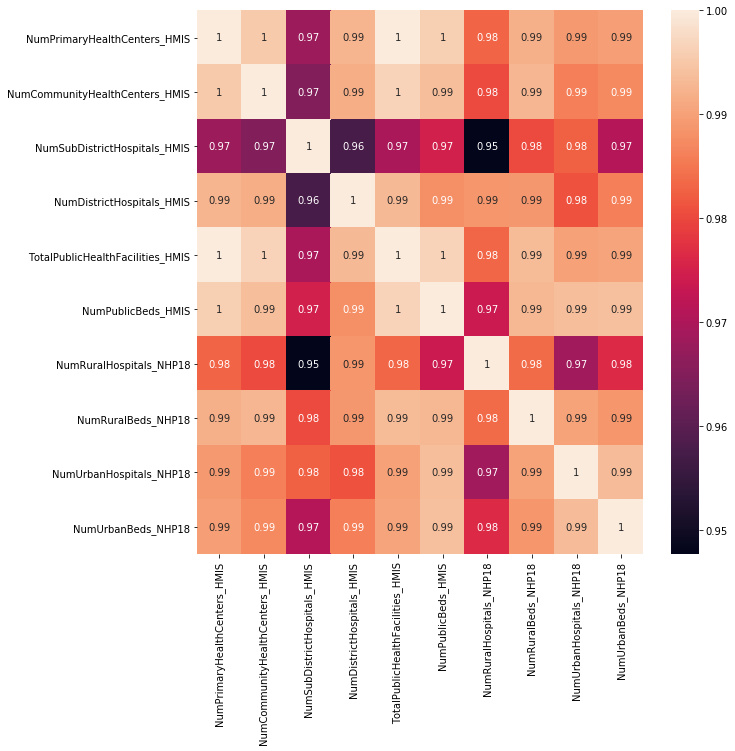

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)
plt.show()

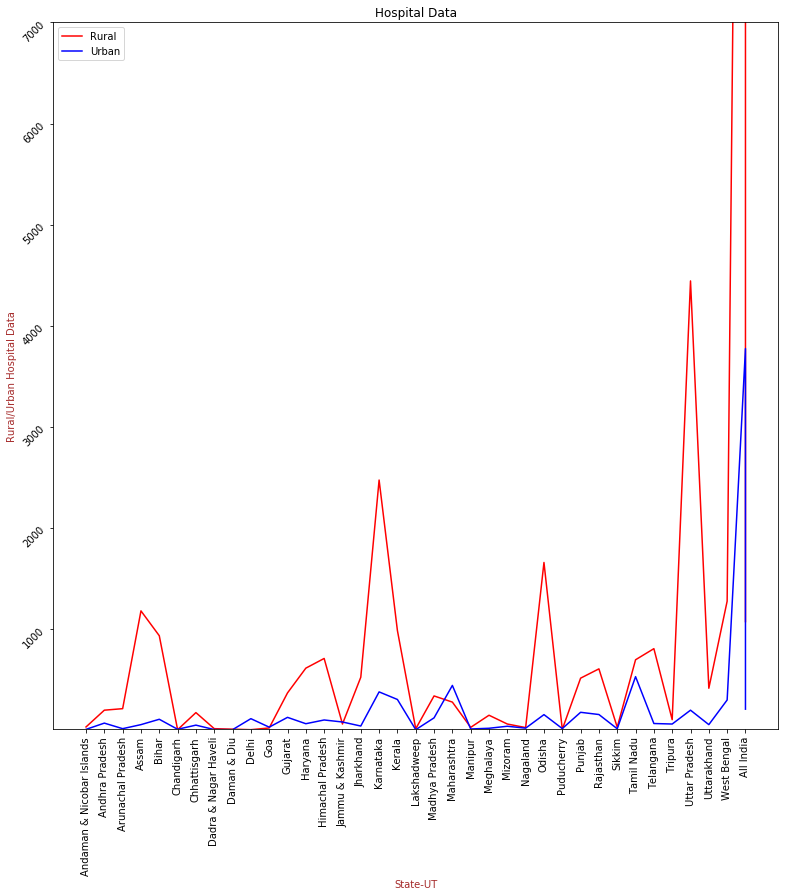

In [45]:
state=df1['State/UT']
rur=df1['NumRuralHospitals_NHP18']
urb=df1['NumUrbanHospitals_NHP18']
plt.figure(figsize=(13,13))
plt.plot(state, rur, color="Red")
plt.plot(state, urb, color="Blue")
plt.xlabel("State-UT",color="Brown")
plt.ylabel("Rural/Urban Hospital Data",color="Brown")
plt.title("Hospital Data")
plt.legend(labels=["Rural", "Urban"])
plt.ylim((5, 7000))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

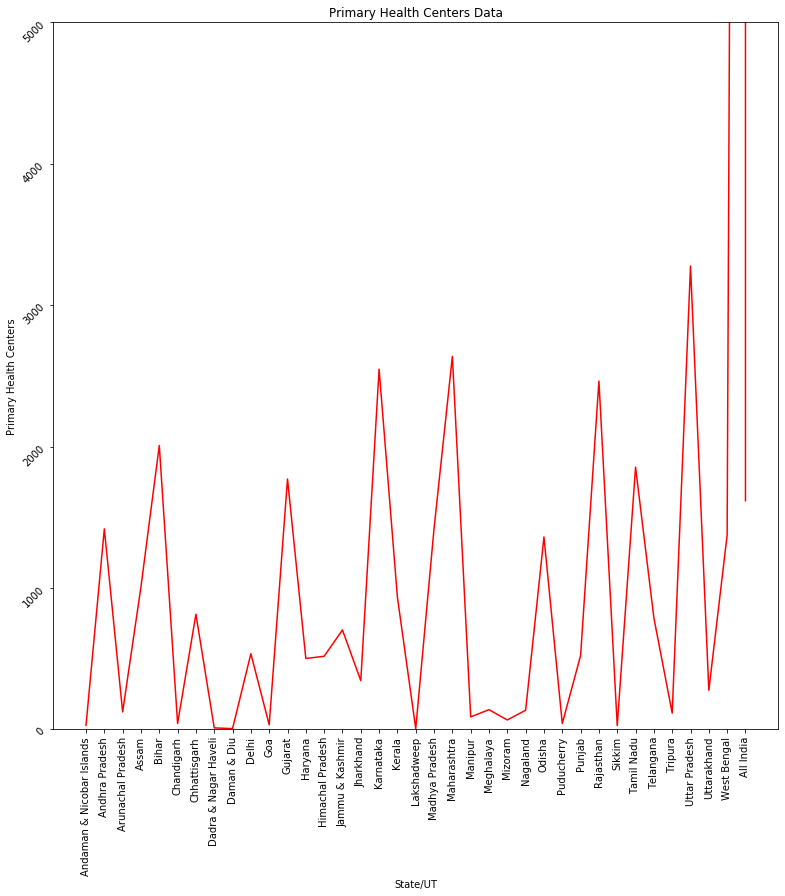

In [46]:
state=df1['State/UT']
pf=df1['NumPrimaryHealthCenters_HMIS']

plt.figure(figsize=(13,13))
plt.plot(state, pf,color="Red")
plt.xlabel("State/UT")
plt.ylabel("Primary Health Centers")
plt.title("Primary Health Centers Data")
plt.ylim((0, 5000))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

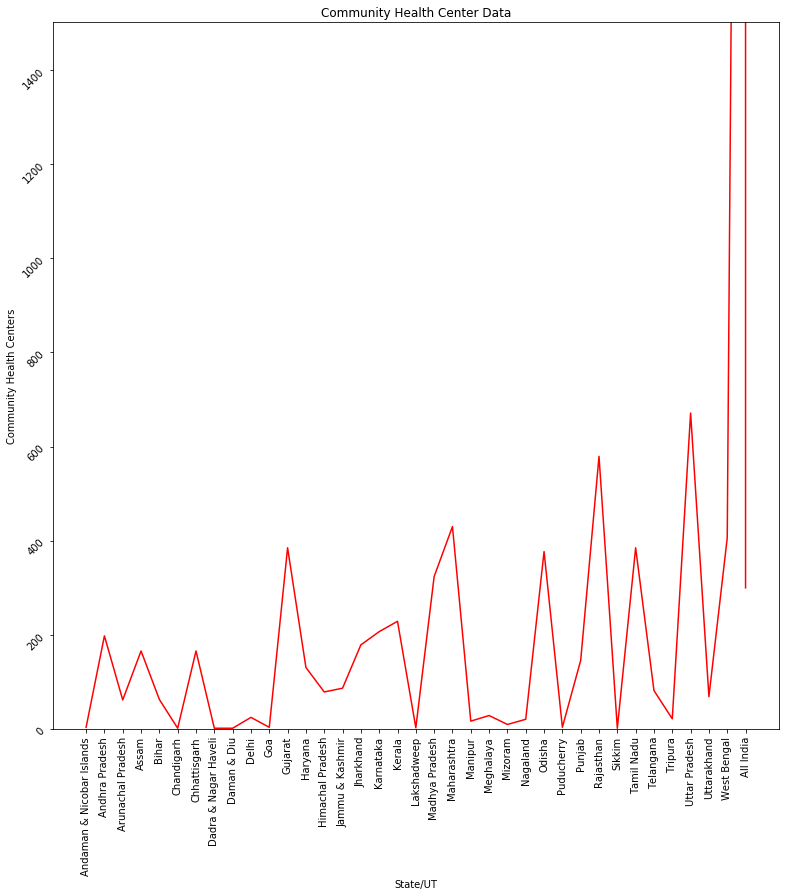

In [47]:
state=df1['State/UT']
cs=df1['NumCommunityHealthCenters_HMIS']

plt.figure(figsize=(13,13))
plt.plot(state, cs,color="Red")
plt.xlabel("State/UT")
plt.ylabel("Community Health Centers")
plt.title("Community Health Center Data")
plt.ylim((0, 1500))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

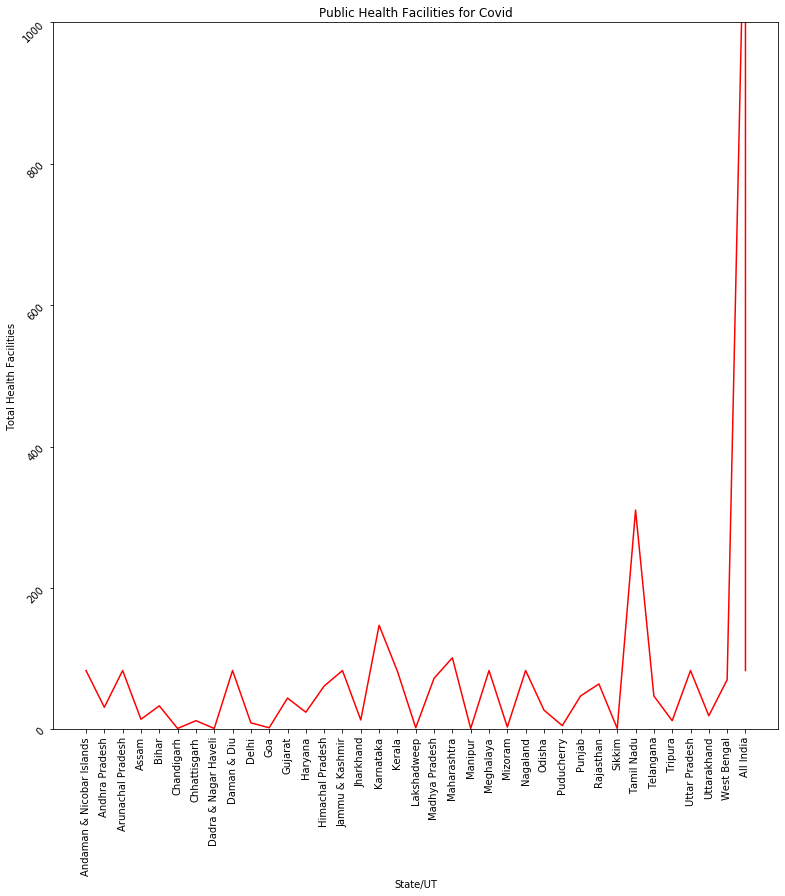

In [48]:
state=df1['State/UT']
hf=df1['NumSubDistrictHospitals_HMIS']

plt.figure(figsize=(13,13))
plt.plot(state, hf,color="Red")
plt.xlabel("State/UT")
plt.ylabel("Total Health Facilities")
plt.title("Public Health Facilities for Covid")
plt.ylim((0, 1000))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

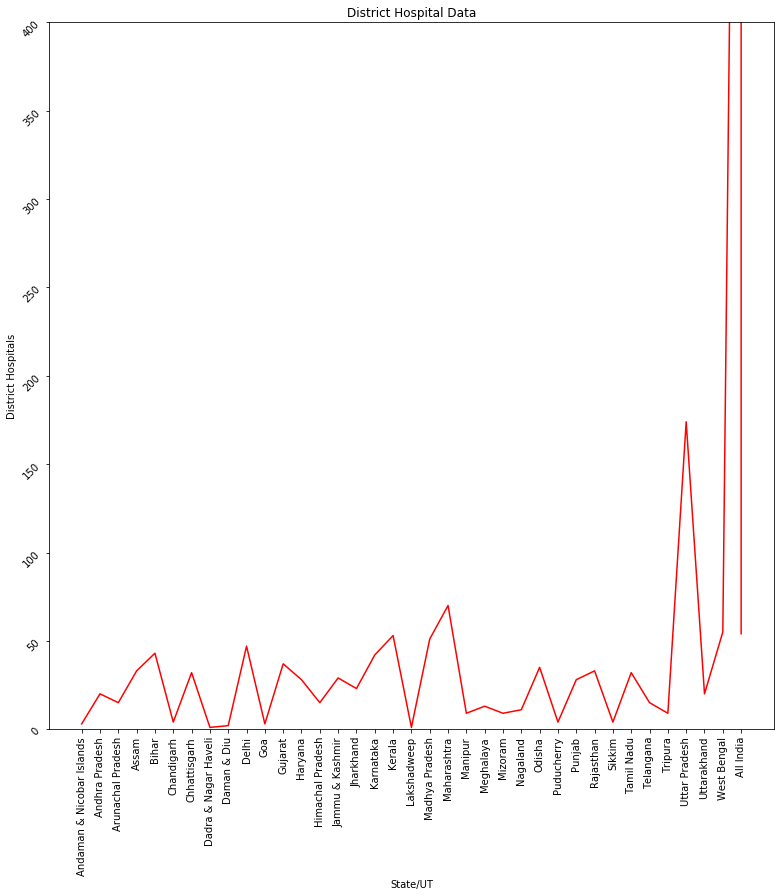

In [49]:
state=df1['State/UT']
dist=df1['NumDistrictHospitals_HMIS']

plt.figure(figsize=(13,13))
plt.plot(state, dist,color="Red")
plt.xlabel("State/UT")
plt.ylabel("District Hospitals")
plt.title("District Hospital Data")
plt.ylim((0, 400))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

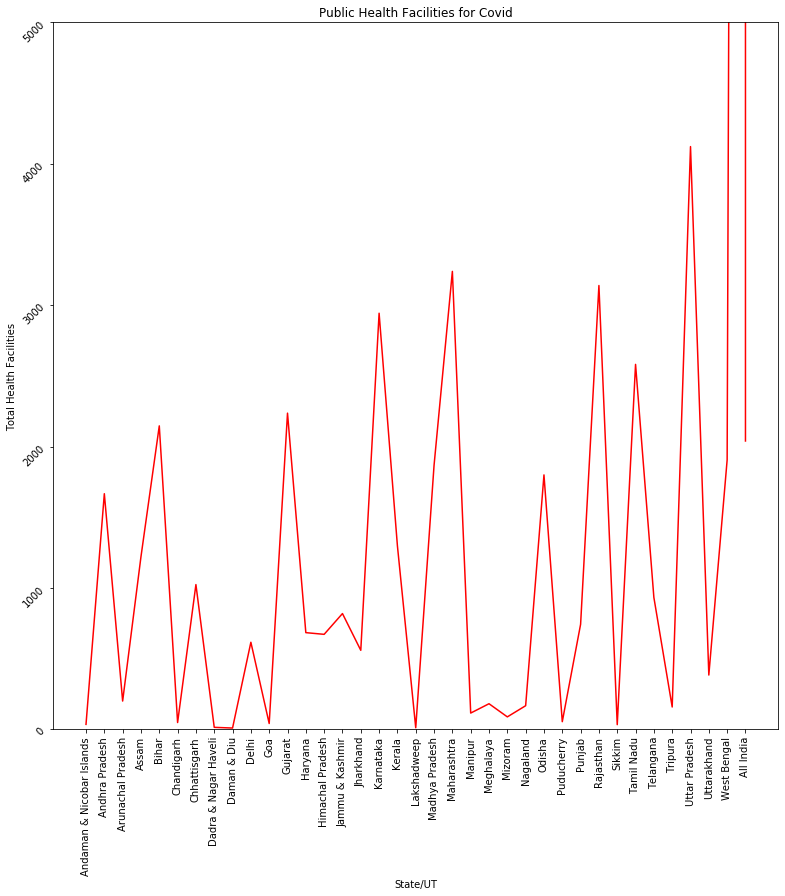

In [50]:
state=df1['State/UT']
hf=df1['TotalPublicHealthFacilities_HMIS']

plt.figure(figsize=(13,13))
plt.plot(state, hf,color="Red")
plt.xlabel("State/UT")
plt.ylabel("Total Health Facilities")
plt.title("Public Health Facilities for Covid")
plt.ylim((0, 5000))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

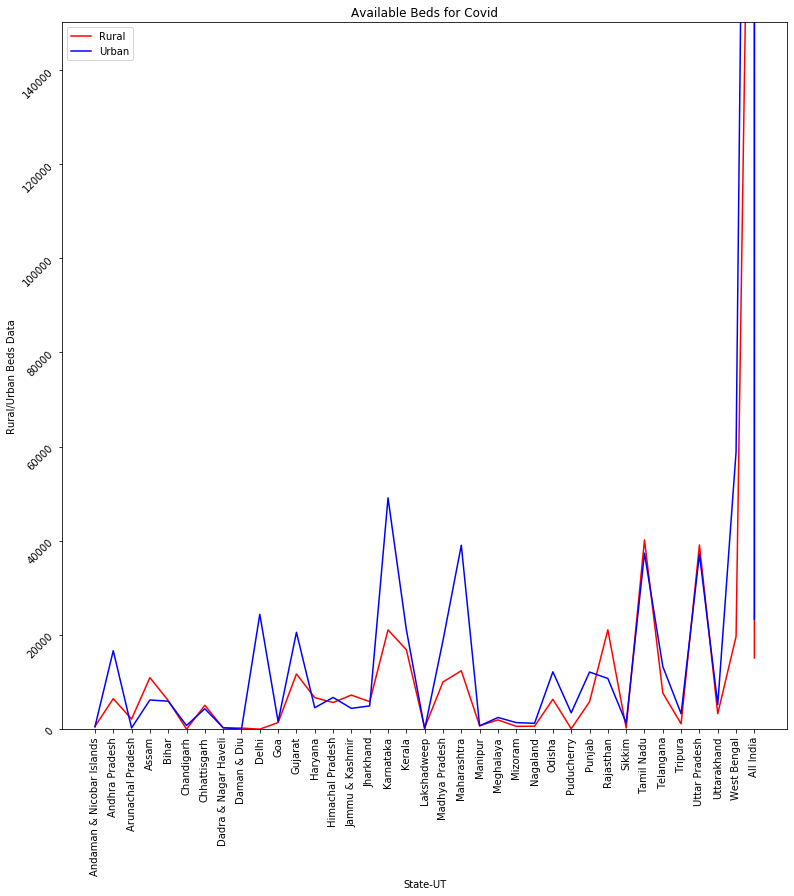

In [51]:
state=df1['State/UT']
r=df1['NumRuralBeds_NHP18']
u=df1['NumUrbanBeds_NHP18']
plt.figure(figsize=(13,13))
plt.plot(state, r, color="Red")
plt.plot(state, u, color="Blue")
plt.xlabel("State-UT")
plt.ylabel("Rural/Urban Beds Data")
plt.title("Available Beds for Covid")
plt.legend(labels=["Rural", "Urban"])
plt.ylim((0, 150000))
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

In [52]:
df2 = pd.read_csv('population_india_census2011.csv')

In [53]:
df2.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sno                      36 non-null     int64 
 1   State / Union Territory  36 non-null     object
 2   Population               36 non-null     int64 
 3   Rural population         36 non-null     int64 
 4   Urban population         36 non-null     int64 
 5   Area                     36 non-null     object
 6   Density                  36 non-null     object
 7   Gender Ratio             36 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 2.4+ KB


In [55]:
df2.drop('Sno', axis=1, inplace=True)

In [56]:
df2.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [57]:
df2.corr()

,Population,Rural population,Urban population,Gender Ratio
Population,1.000000,0.980927,0.879607,0.071828
Rural population,0.980927,1.000000,0.770365,0.053117
Urban population,0.879607,0.770365,1.000000,0.105618
Gender Ratio,0.071828,0.053117,0.105618,1.000000


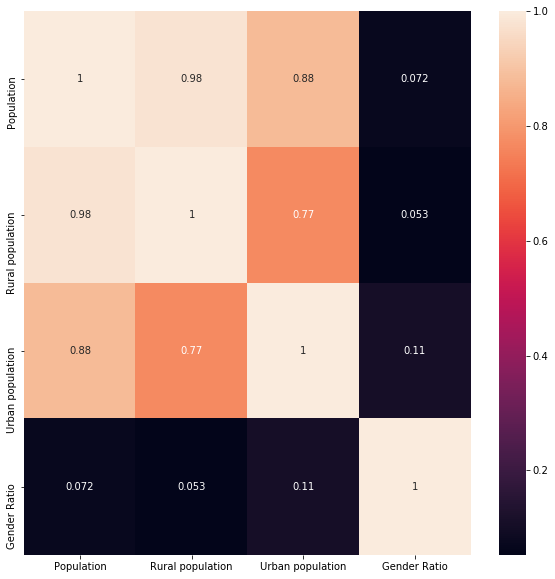

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True)
plt.show()

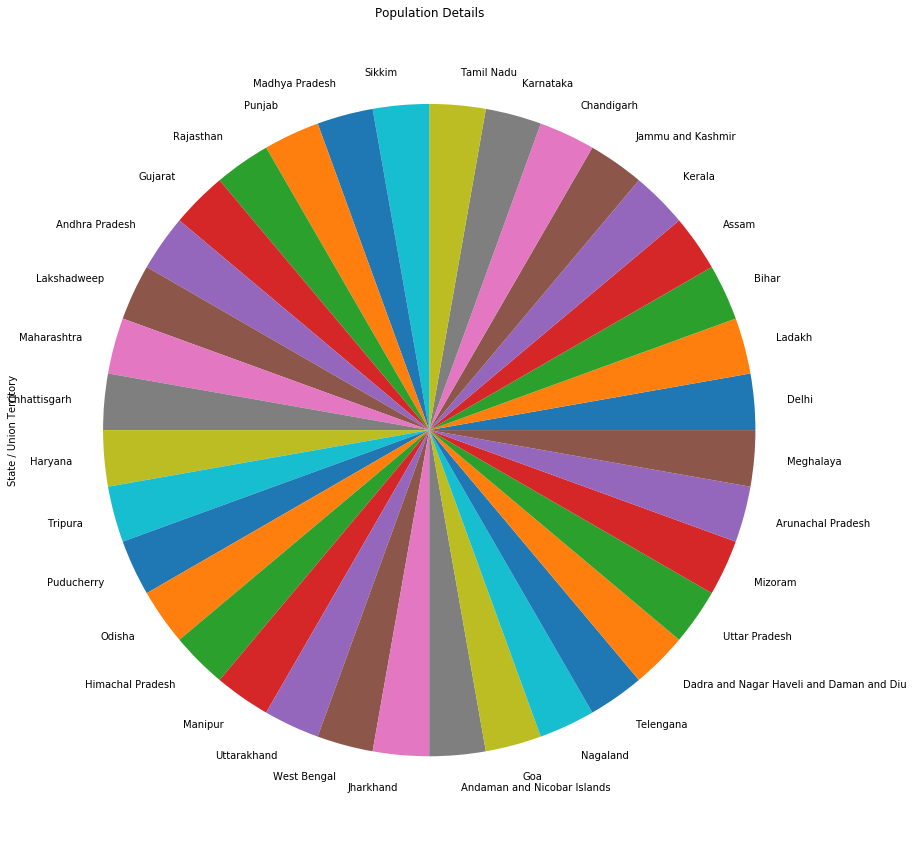

In [59]:
dfx=df2['State / Union Territory']
plt.figure(figsize=(15,15))
dfx.value_counts().plot(kind="pie").set_title("Population Details")
plt.show()

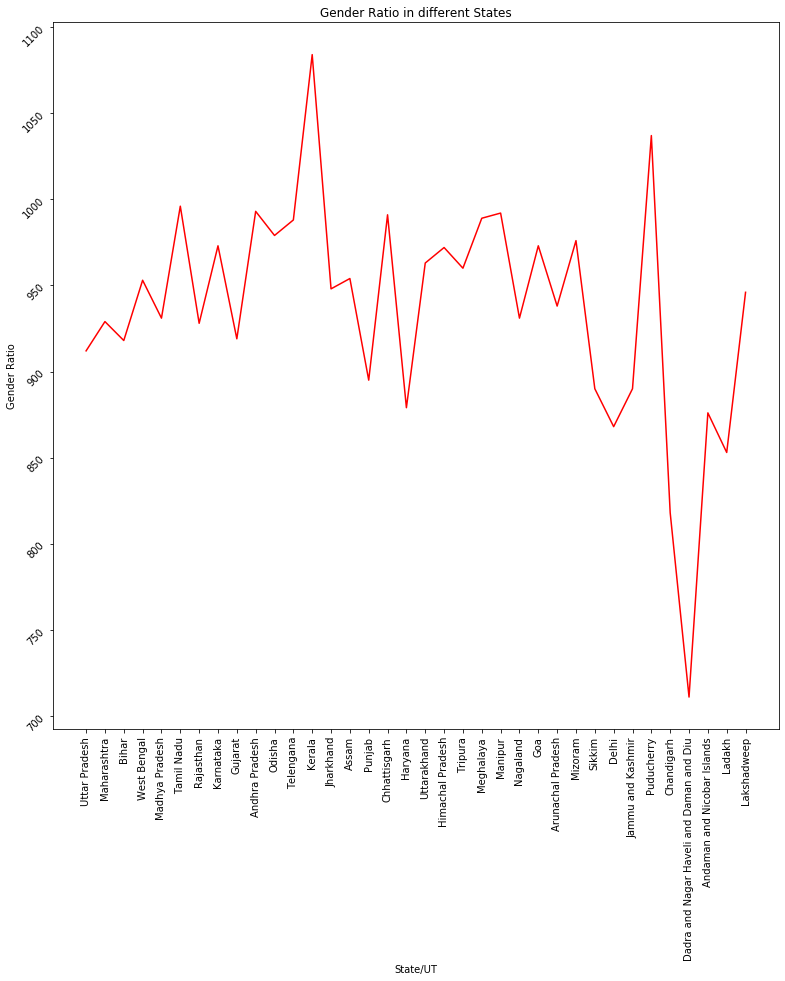

In [60]:
state=df2['State / Union Territory']
gender=df2['Gender Ratio']

plt.figure(figsize=(13,13))
plt.plot(state, gender,color="Red")
plt.xlabel("State/UT")
plt.ylabel("Gender Ratio")
plt.title("Gender Ratio in different States")
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

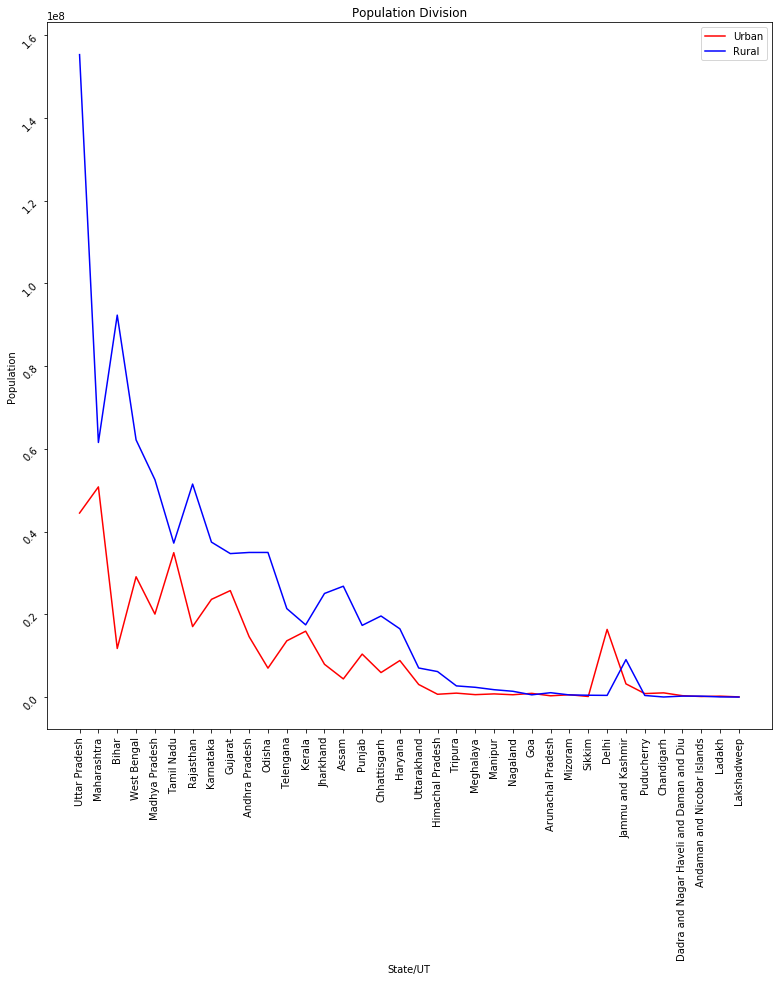

In [61]:
state=df2['State / Union Territory']
pop=df2['Urban population']
pop2=df2['Rural population']
plt.figure(figsize=(13,13))
plt.plot(state, pop, color="Red")
plt.plot(state, pop2, color="Blue")
plt.xlabel("State/UT")
plt.ylabel("Population")
plt.title("Population Division")
plt.legend(labels=["Urban", "Rural"])
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [63]:
df1=pd.read_csv("ICMRTestingDetails.csv")
df2=pd.read_csv("ICMRTestingLabs.csv")
df3=pd.read_csv("IndividualDetails.csv")

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      213 non-null    object
 1   address  213 non-null    object
 2   pincode  213 non-null    int64 
 3   city     213 non-null    object
 4   state    213 non-null    object
 5   type     213 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.1+ KB


In [65]:
df2['pincode'].value_counts()

400012    4
380006    3
122001    3
620001    2
411001    2
         ..
516002    1
452001    1
122016    1
400703    1
700160    1
Name: pincode, Length: 192, dtype: int64

In [66]:
df2.drop('pincode',axis=1,inplace=True)

In [67]:
df2['address'].value_counts()

Bhopal Memorial Hospital & Research Centre, Raisen Rd, Near Best Price, BMHRC Campus, Karond, Bhopal, Madhya Pradesh 462038                              1
Unipath Speciality Laboratory Limited,, 102, 1st Floor, Sanoma Plaza, Sheth Mangald Road, Opp. Parimal Garden, Ellisbridge, Ahmedabad, Gujarat 380006    1
Government Medical College & Hospital, Chandi Path, Sector 32B, 32B, Sector 32, Chandigarh, 160047                                                       1
A.G Diagnostics Pvt Ltd, CTS No 809, F.P. 147, Nayantara Building, Bhandarkar Road, Pune, Maharashtra 411004                                             1
Gulbarga Institute Of Medical Sciences, Sedam Rd,Veeresh Nagar Cross, behind MRMC, Gulbarga, Karnataka 585101                                            1
                                                                                                                                                        ..
Kokilaben Dhirubhai Ambani Hospital Laboratory, Four Bungalows, Andher

In [68]:
df2.drop('address',axis=1,inplace=True)

In [69]:
df2['lab'].value_counts()

K.A.P. Viswanatham Government Medical College, Trichy       2
Command Hospital, Udhampur                                  1
Dr. Dang’s Lab, New Delhi                                   1
V. M. Govt. Medical College, Solapur                        1
Silchar Medical College, Silchar                            1
                                                           ..
All India Institute of Medical Sciences (AIIMS), Jodhpur    1
Institute of Preventive Medicine, Hyderabad                 1
Jawaharlal Nehru Medical College, Aligarh                   1
Government Medical College, Thiruvarur                      1
City x-Ray & Scan Clinic Pvt. Ltd., New Delhi               1
Name: lab, Length: 212, dtype: int64

In [70]:
df2.drop('lab',axis=1,inplace=True)

In [71]:
df2.head()

,city,state,type
0,Port Blair,Andaman and Nicobar Islands,Government Laboratory Supported
1,Naharlagun,Arunachal Pradesh,Collection Site
2,Tirupati,Andhra Pradesh,Government Laboratory Supported
3,Kakinada,Andhra Pradesh,Government Laboratory Supported
4,Vijayawada,Andhra Pradesh,Government Laboratory Supported


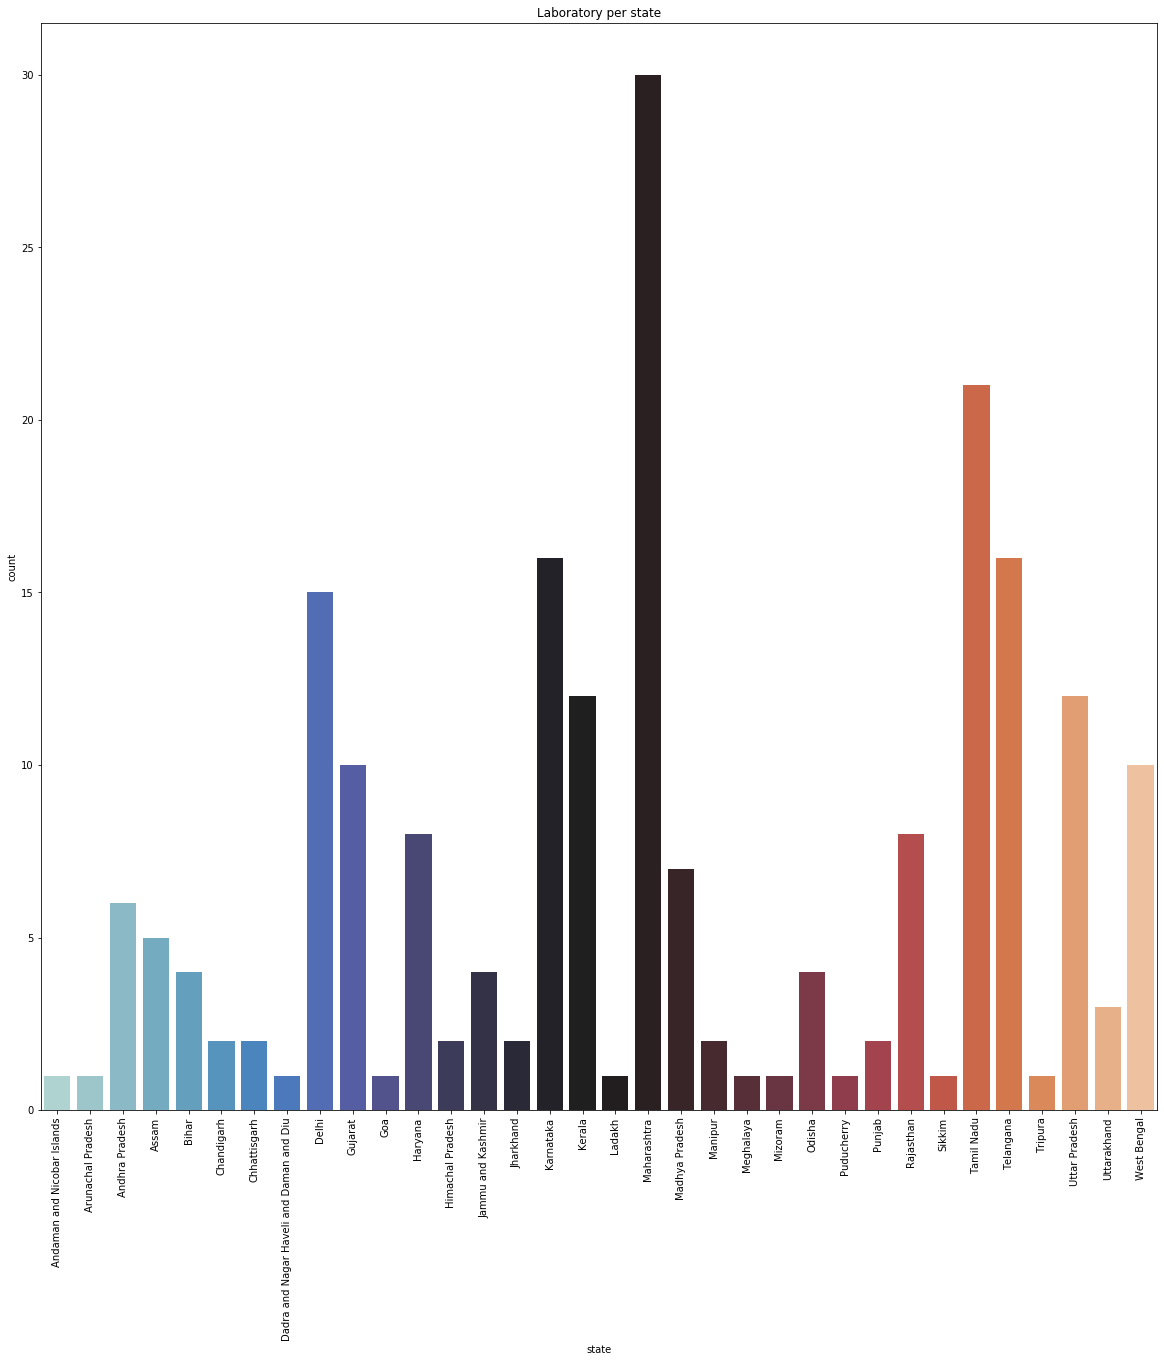

In [72]:
plt.figure(figsize=(20,20))
chart=sns.countplot(data=df2, x="state",palette="icefire")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title("Laboratory per state")
plt.show()

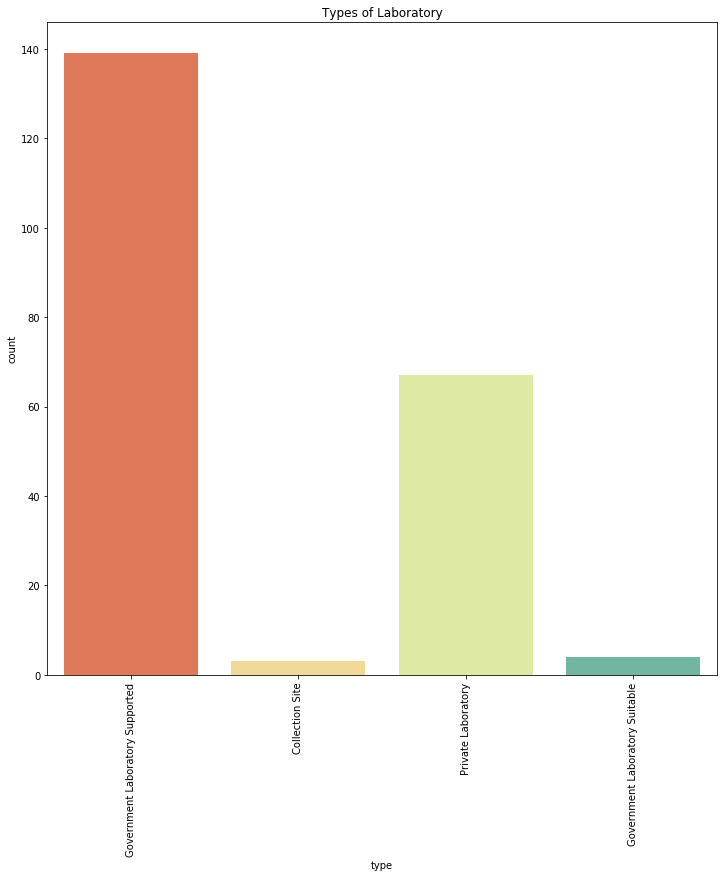

In [73]:
plt.figure(figsize=(12,12))
chart=sns.countplot(data=df2, x="type",palette="Spectral")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title("Types of Laboratory")
plt.show()

In [74]:
dfx=df2.groupby('state')['city'].value_counts()

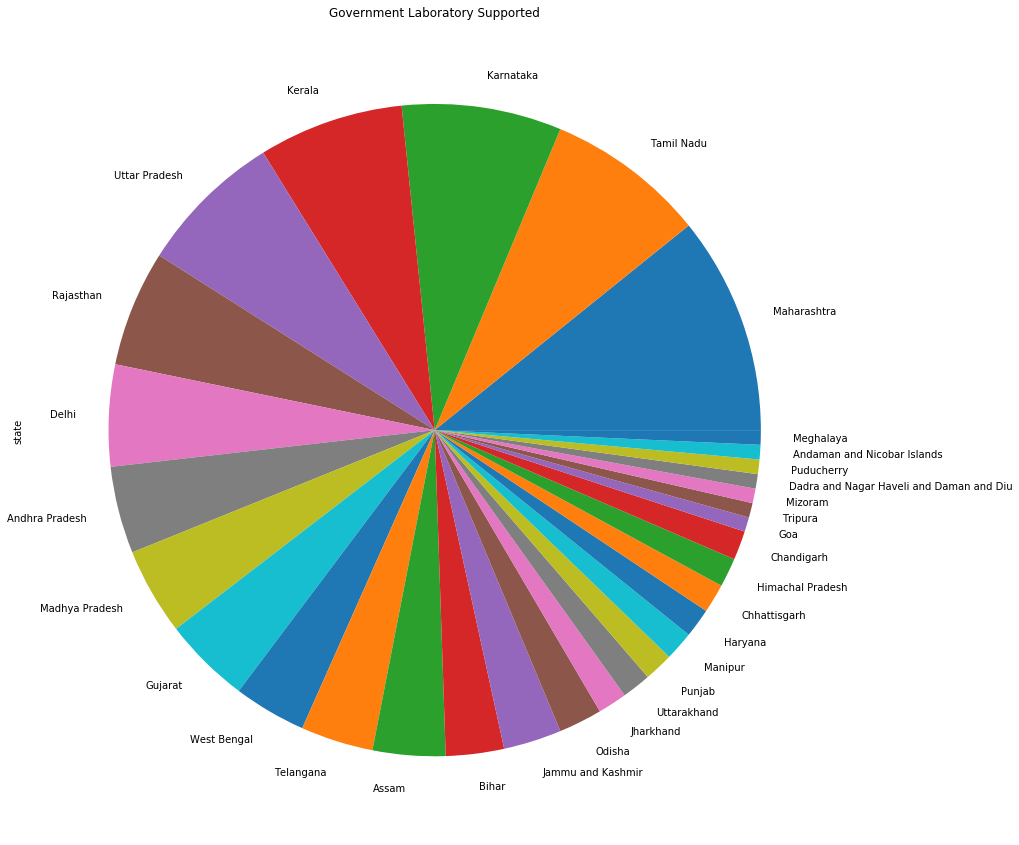

In [75]:
dfx=df2[df2['type']=='Government Laboratory Supported']
plt.figure(figsize=(15,15))
dfx['state'].value_counts().plot(kind="pie").set_title("Government Laboratory Supported")
plt.show()

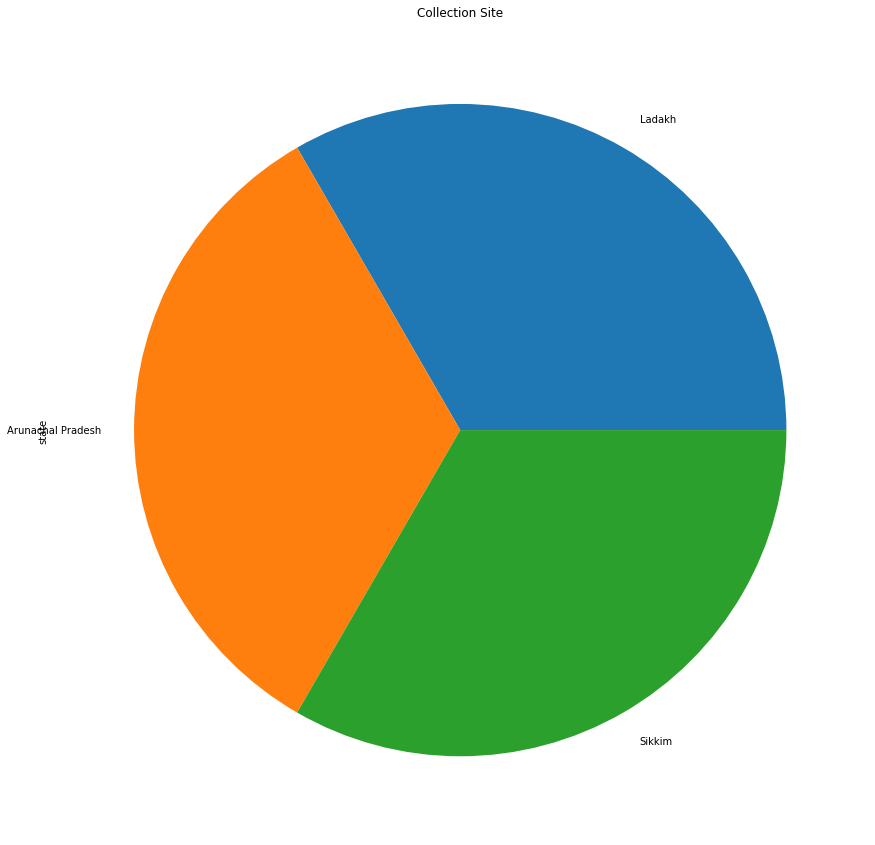

In [76]:
dfx=df2[df2['type']=='Collection Site']
plt.figure(figsize=(15,15))
dfx['state'].value_counts().plot(kind="pie").set_title("Collection Site")
plt.show()

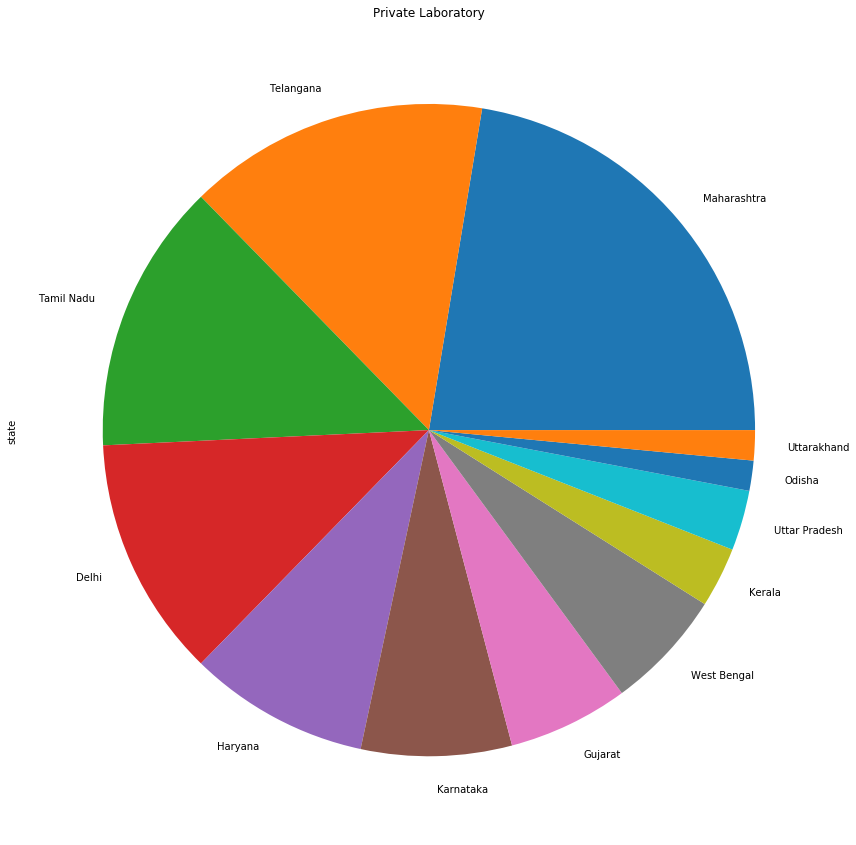

In [77]:
dfx=df2[df2['type']=='Private Laboratory']
plt.figure(figsize=(15,15))
dfx['state'].value_counts().plot(kind="pie").set_title("Private Laboratory")
plt.show()

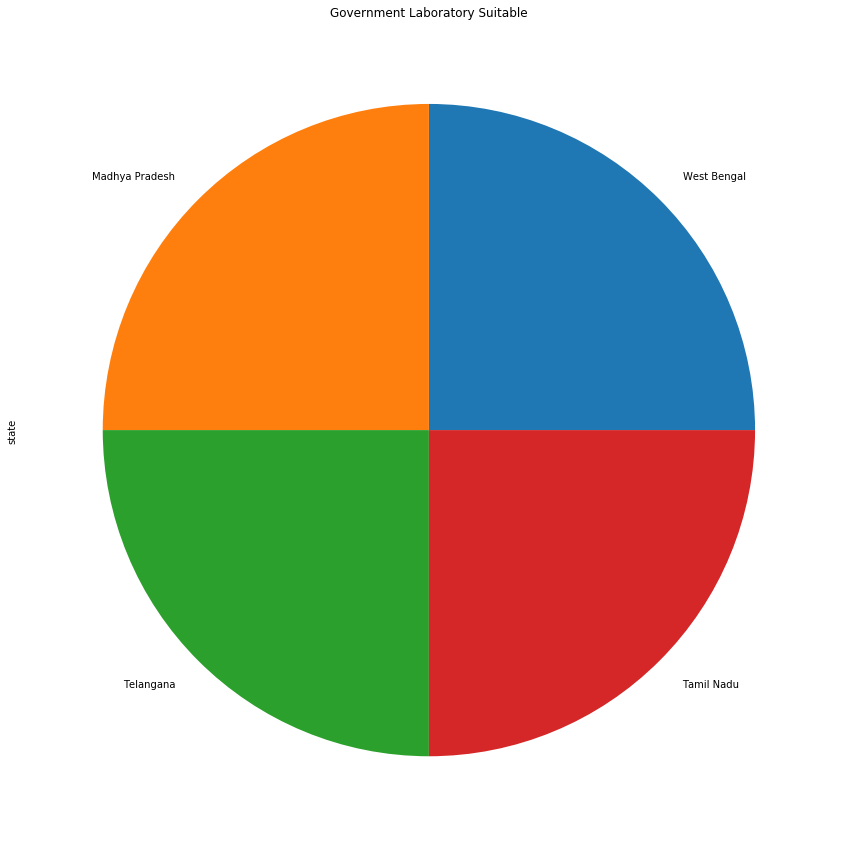

In [78]:
dfx=df2[df2['type']=='Government Laboratory Suitable']
plt.figure(figsize=(15,15))
dfx['state'].value_counts().plot(kind="pie").set_title("Government Laboratory Suitable")
plt.show()

In [79]:
df1['DateTime'].value_counts()

29/03/20 18:00    1
28/03/20 18:00    1
02/04/20 21:00    1
07/04/20 21:00    1
26/03/20 20:00    1
22/03/20 18:00    1
05/04/20 21:00    1
19/03/20 18:00    1
03/04/20 21:00    1
09/04/20 21:00    1
23/03/20 20:00    1
20/03/20 18:00    1
08/04/20 21:00    1
13/03/20 18:00    1
06/04/20 21:00    1
24/03/20 20:00    1
01/04/20 18:00    1
27/03/20 9:00     1
04/04/20 21:00    1
30/03/20 18:00    1
21/03/20 18:00    1
25/03/20 20:00    1
18/03/20 18:00    1
31/03/20 18:00    1
Name: DateTime, dtype: int64

In [80]:
df1.drop('DateTime',axis=1,inplace=True)

In [81]:
df1['Source'].value_counts()

ICMR_website_update_19March_6PM_IST.pdf    1
ICMR_website_update_24March_8PM_IST.pdf    1
ICMR_website_update_25March_8PM_IST.pdf    1
ICMR_website_update_23March_8PM_IST.pdf    1
ICMR_website_update_18March_6PM_IST.pdf    1
ICMR_website_update_21March_6PM_IST.pdf    1
ICMR_website_update_20March_6PM_IST.pdf    1
Press_Release_ICMR_13March2020.pdf         1
ICMR_website_update_22March_6PM_IST.pdf    1
Name: Source, dtype: int64

In [82]:
df1.drop('Source',axis=1,inplace=True)

In [83]:
df1.head()

,SNo,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
0,1,6500.0,5900.0,78.0
1,2,13125.0,12235.0,150.0
2,3,14175.0,13285.0,182.0
3,4,15404.0,14514.0,236.0
4,5,16911.0,16021.0,315.0


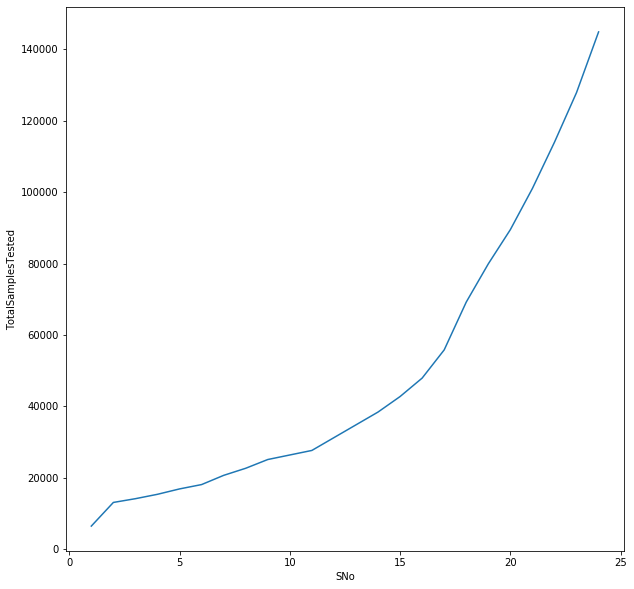

In [84]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1, x="SNo", y="TotalSamplesTested")
plt.show()

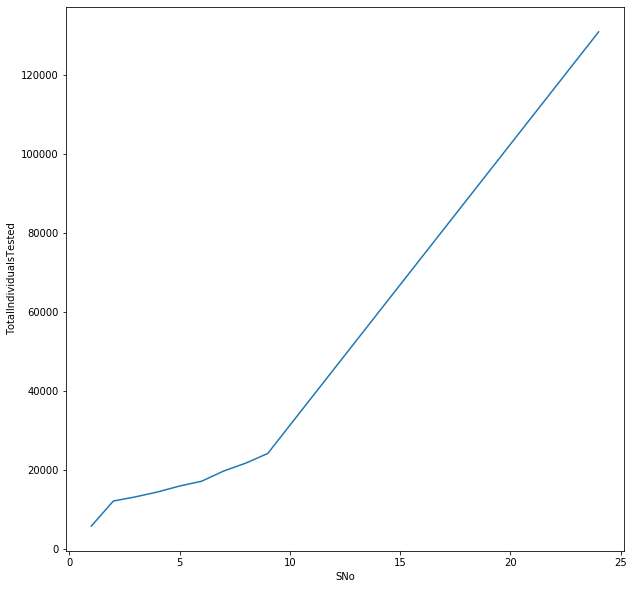

In [85]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1, x="SNo", y="TotalIndividualsTested")
plt.show()

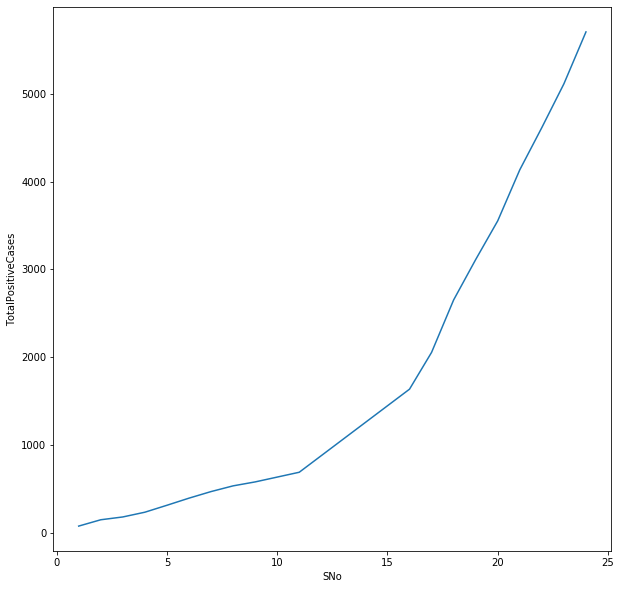

In [86]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1, x="SNo", y="TotalPositiveCases")
plt.show()

In [87]:
df3.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [88]:
df3['id'].value_counts()

2047    1
3307    1
1266    1
3315    1
5368    1
       ..
573     1
6718    1
4671    1
2628    1
0       1
Name: id, Length: 6821, dtype: int64

In [89]:
df3.drop('id',axis=1,inplace=True)

In [90]:
df3['government_id'].value_counts()

KL-TS-P1     2
AP-P110      2
KL-PT-P2     2
UP-GBN-15    2
KL-PT-P1     2
            ..
TN-P64       1
TN-P257      1
KA-P31       1
KA-P162      1
KA-P26       1
Name: government_id, Length: 1303, dtype: int64

In [91]:
df3.drop('government_id',axis=1,inplace=True)

In [92]:
df3['gender'].value_counts()

M    1219
F     453
Name: gender, dtype: int64

In [93]:
df3.isnull().sum()

diagnosed_date           0
age                   5747
gender                5149
detected_city         5899
detected_district     1349
detected_state           0
nationality           5647
current_status           1
status_change_date     110
notes                 1190
dtype: int64

In [94]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6821 entries, 0 to 6820
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   diagnosed_date      6821 non-null   object
 1   age                 1074 non-null   object
 2   gender              1672 non-null   object
 3   detected_city       922 non-null    object
 4   detected_district   5472 non-null   object
 5   detected_state      6821 non-null   object
 6   nationality         1174 non-null   object
 7   current_status      6820 non-null   object
 8   status_change_date  6711 non-null   object
 9   notes               5631 non-null   object
dtypes: object(10)
memory usage: 533.0+ KB


In [95]:
df3['notes'].value_counts()

Details awaited                                             2912
Travelled to Delhi                                           862
Details Awaited                                              377
Travelled from Dubai                                          90
Local Transmission                                            89
                                                            ... 
Details awaited 40th case                                      1
Visited Mumbai                                                 1
Daughter of Surya Nagar Patient, ID Unknown                    1
Travelled from Dubai via Bengaluru, Resident of Kerala,        1
Contact with P124 (Daugher-in-law)                             1
Name: notes, Length: 685, dtype: int64

In [96]:
df3.drop('age',axis=1,inplace=True)

In [97]:
df3.drop('detected_city',axis=1,inplace=True)

In [98]:
df3.drop('gender',axis=1,inplace=True)

In [99]:
df3.drop('nationality',axis=1,inplace=True)

In [100]:
df3.head()

,diagnosed_date,detected_district,detected_state,current_status,status_change_date,notes
0,30/01/2020,Thrissur,Kerala,Recovered,14/02/2020,Travelled from Wuhan
1,02/02/2020,Alappuzha,Kerala,Recovered,14/02/2020,Travelled from Wuhan
2,03/02/2020,Kasaragod,Kerala,Recovered,14/02/2020,Travelled from Wuhan
3,02/03/2020,East Delhi,Delhi,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,02/03/2020,Hyderabad,Telangana,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


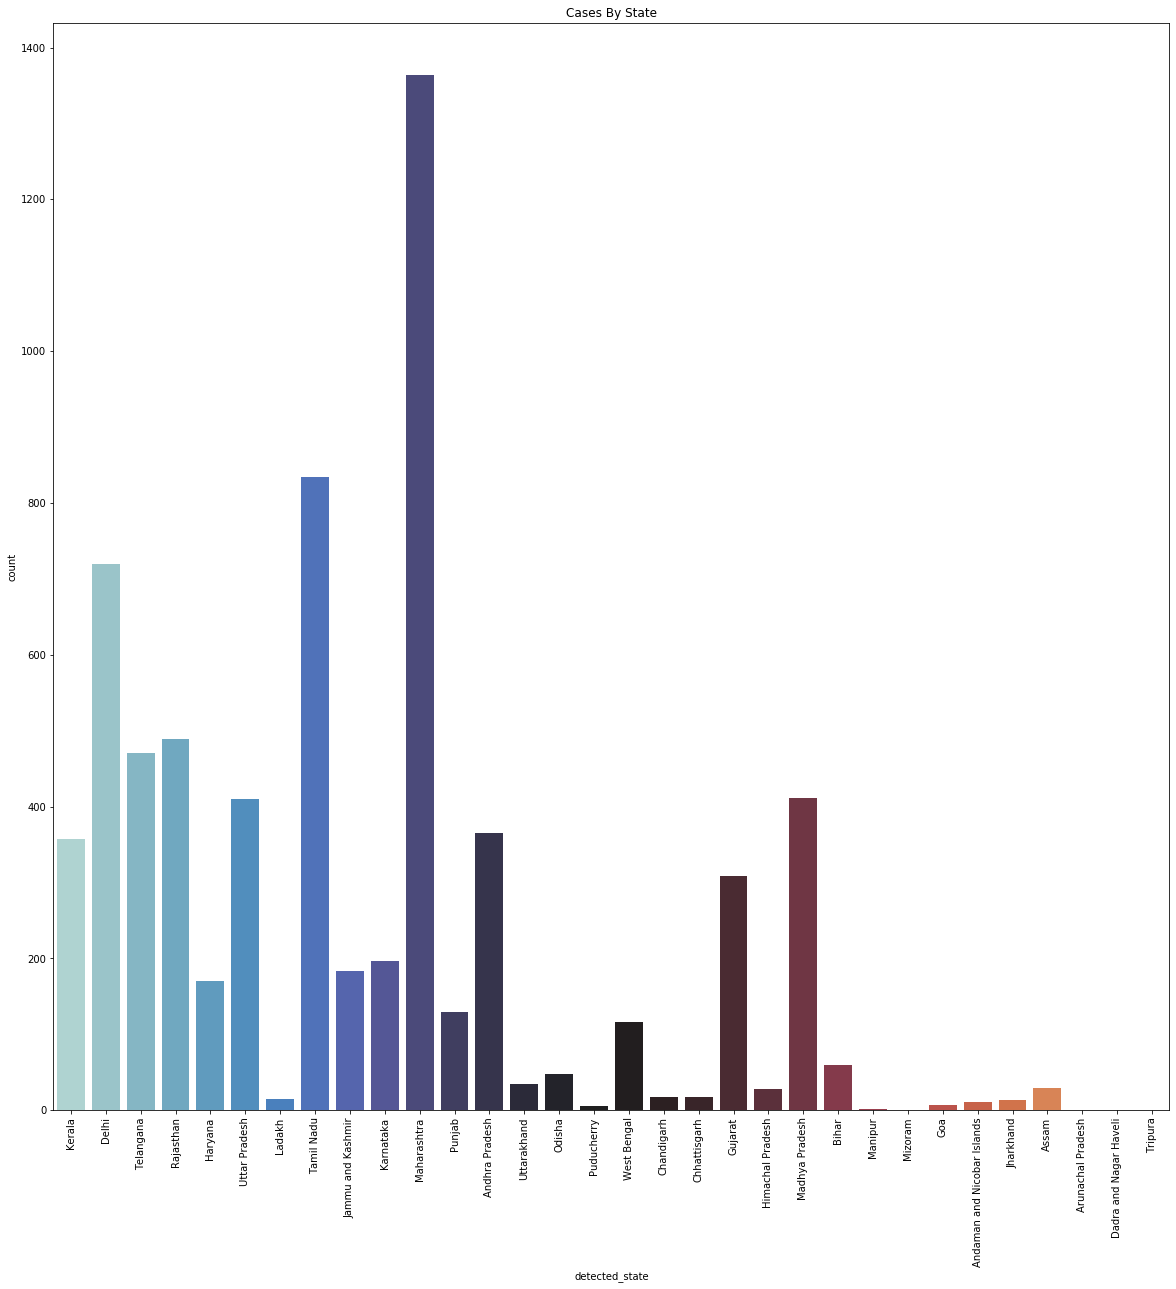

In [101]:
plt.figure(figsize=(20,20))
chart=sns.countplot(data=df3, x="detected_state",palette="icefire")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title("Cases By State")
plt.show()

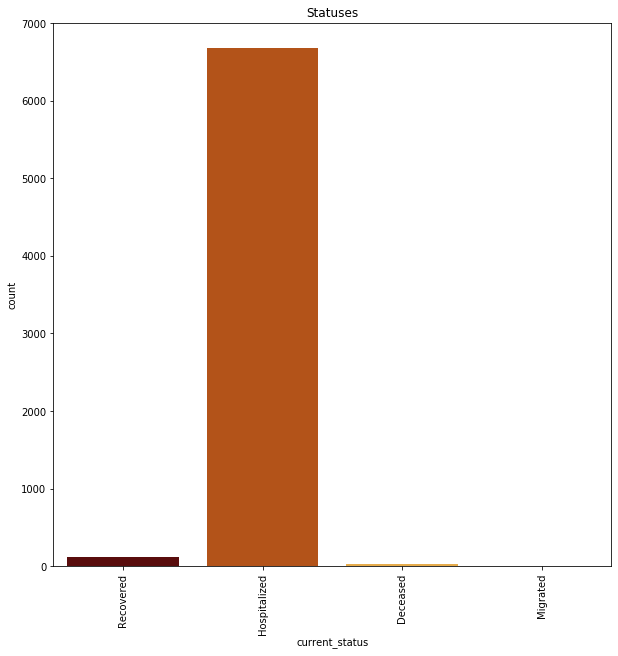

In [102]:
plt.figure(figsize=(10,10))
chart=sns.countplot(data=df3, x="current_status",palette="afmhot")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title("Statuses")
plt.show()

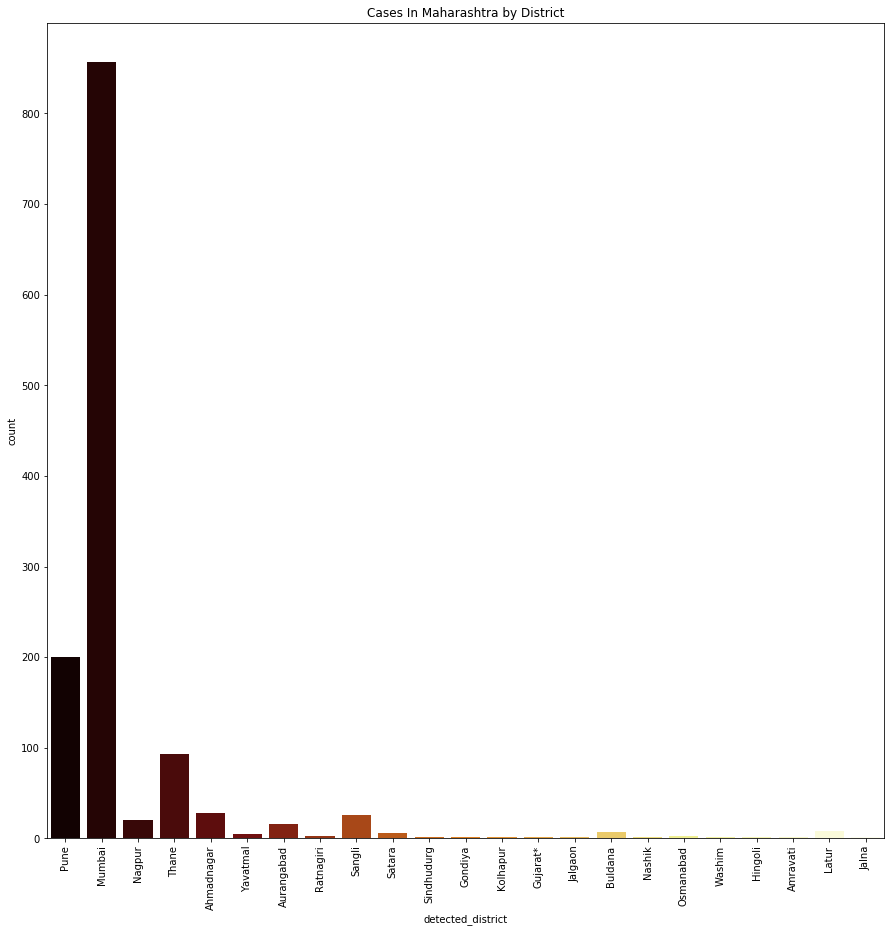

In [103]:
plt.figure(figsize=(15,15))
dfx=df3[df3['detected_state']=='Maharashtra']
chart=sns.countplot(data=dfx, x="detected_district",palette="afmhot")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title("Cases In Maharashtra by District")
plt.show()

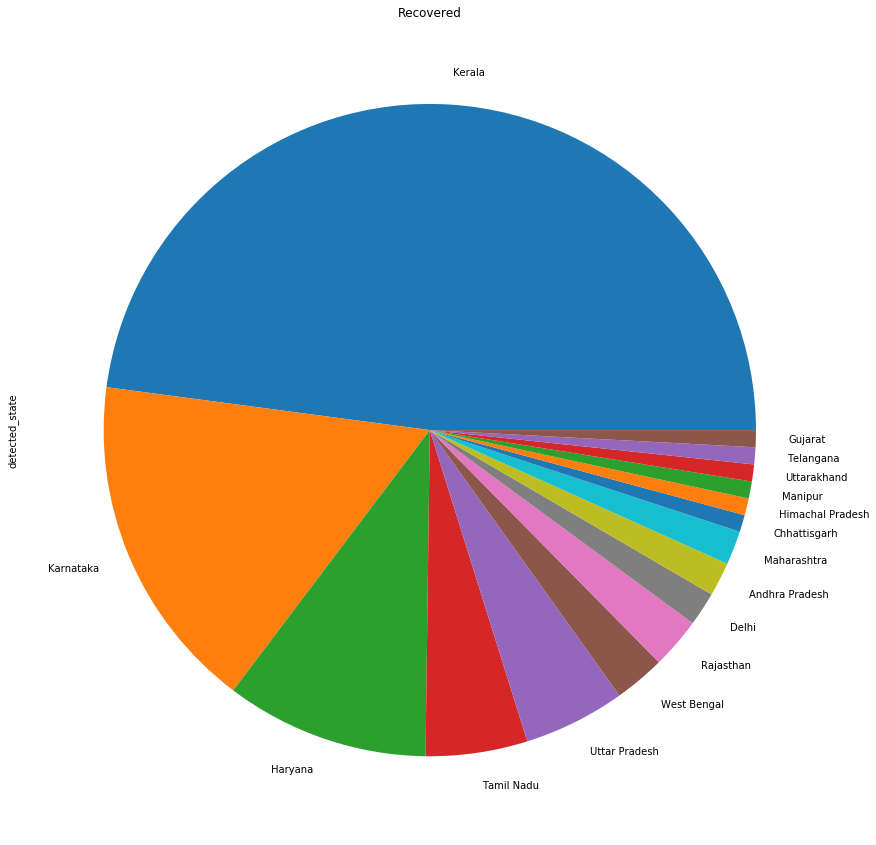

In [104]:
dfx=df3[df3['current_status']=='Recovered']
plt.figure(figsize=(15,15))
dfx['detected_state'].value_counts().plot(kind="pie").set_title("Recovered")
plt.show()

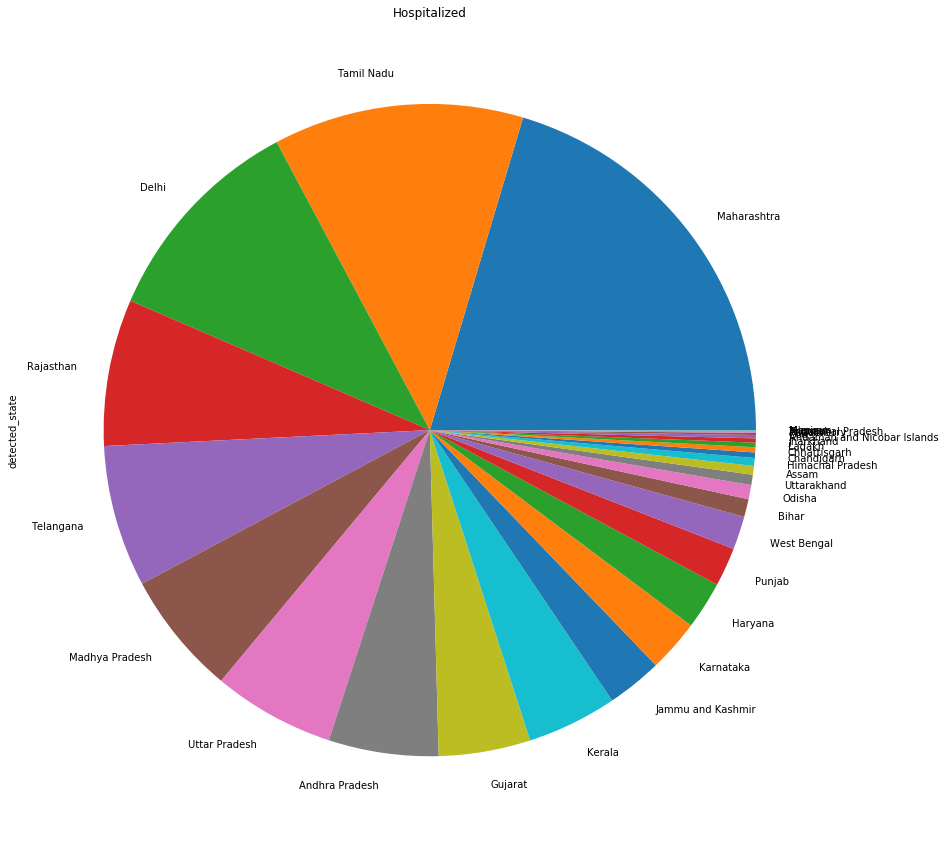

In [105]:
dfx=df3[df3['current_status']=='Hospitalized']
plt.figure(figsize=(15,15))
dfx['detected_state'].value_counts().plot(kind="pie").set_title("Hospitalized")
plt.show()

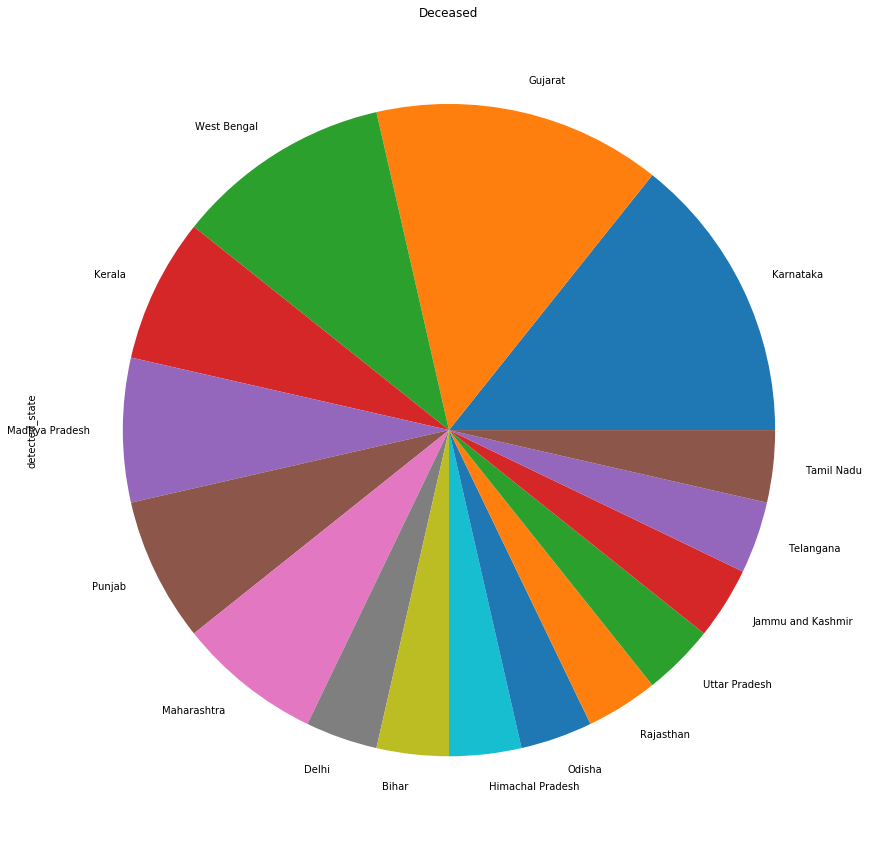

In [106]:
dfx=df3[df3['current_status']=='Deceased']
plt.figure(figsize=(15,15))
dfx['detected_state'].value_counts().plot(kind="pie").set_title("Deceased")
plt.show()

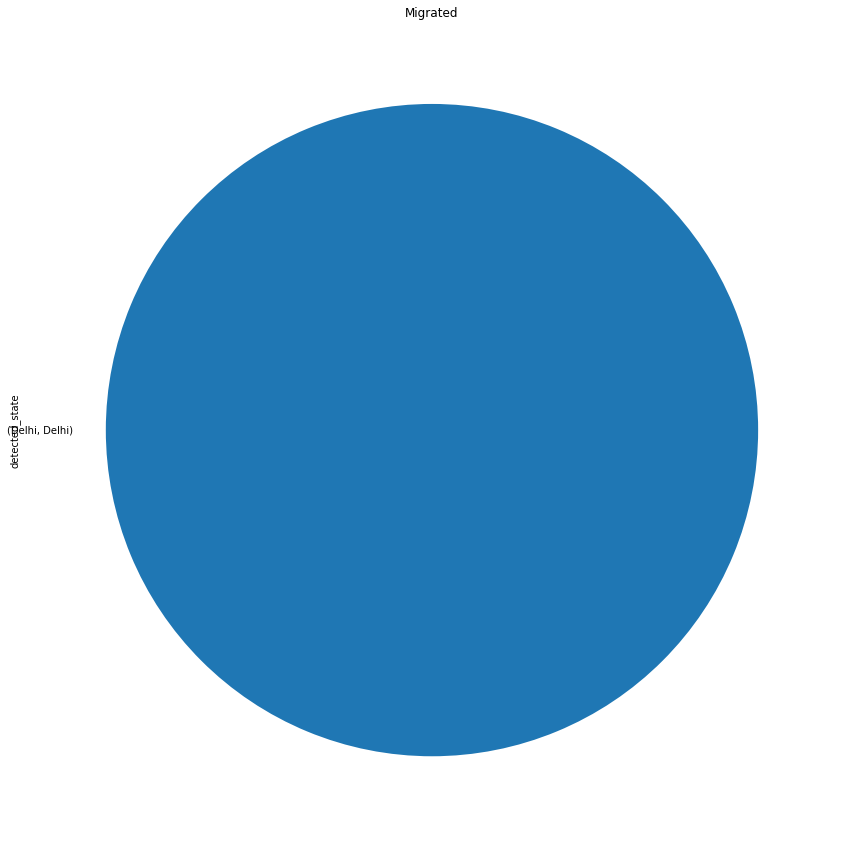

In [107]:
dfx=df3[df3['current_status']=='Migrated'].groupby('detected_state')
plt.figure(figsize=(15,15))
dfx['detected_state'].value_counts().plot(kind="pie").set_title("Migrated")
plt.show()

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import skew
from sklearn.preprocessing import PolynomialFeatures

In [109]:
df = pd.read_csv('covid_19_india.csv')

In [110]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


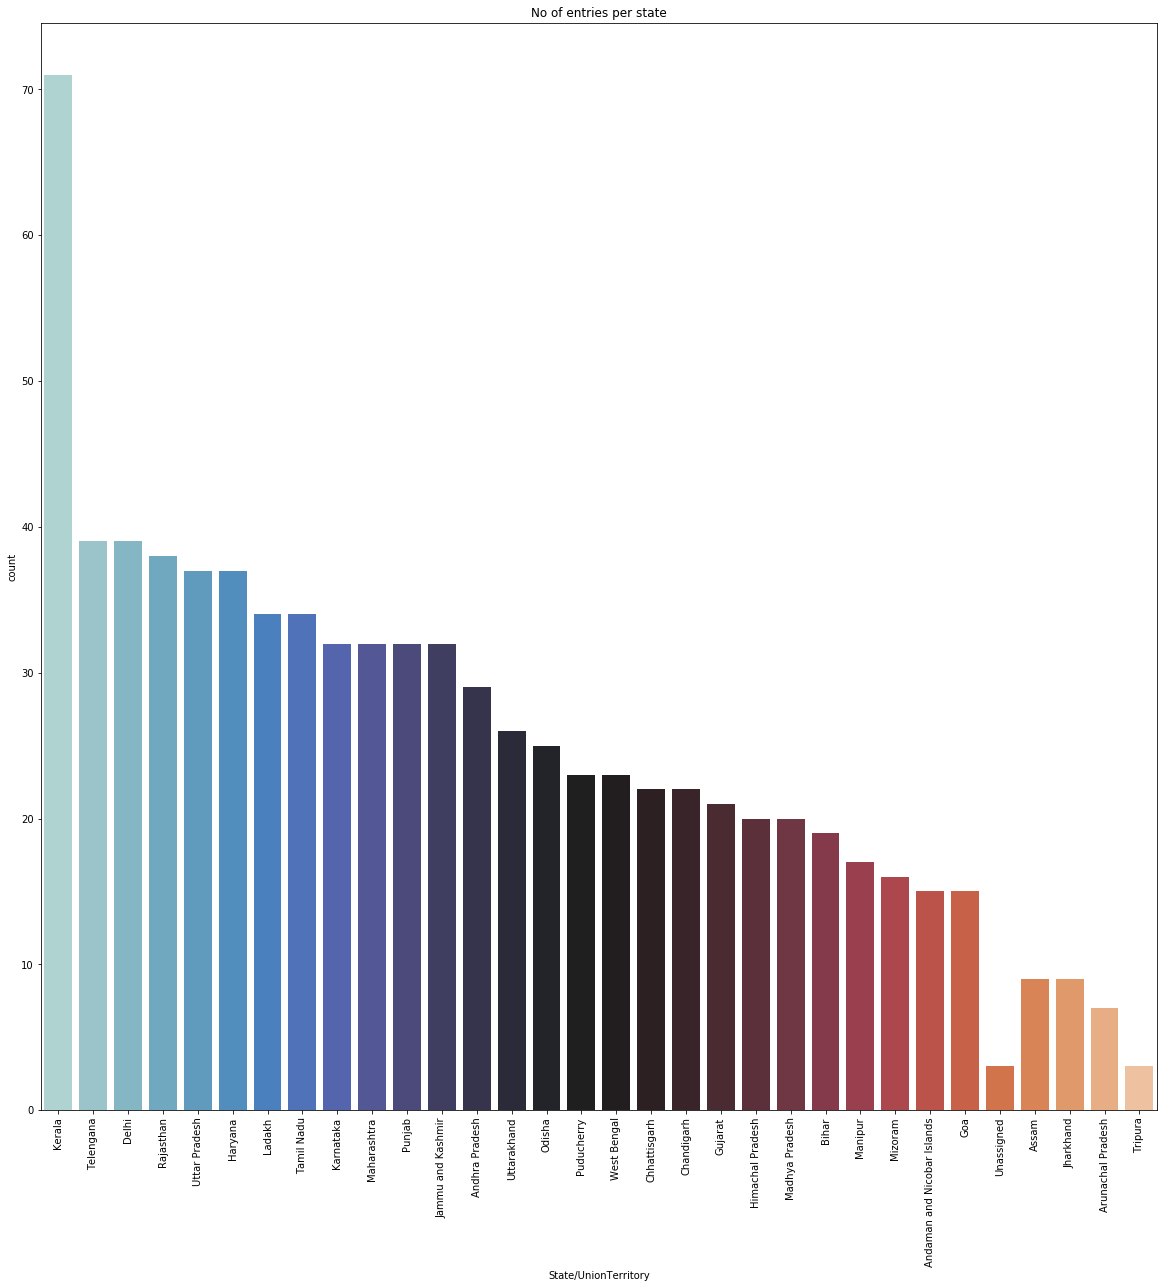

In [111]:
plt.figure(figsize=(20,20))
chart=sns.countplot(data=df, x="State/UnionTerritory",palette="icefire")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title("No of entries per state")
plt.show()

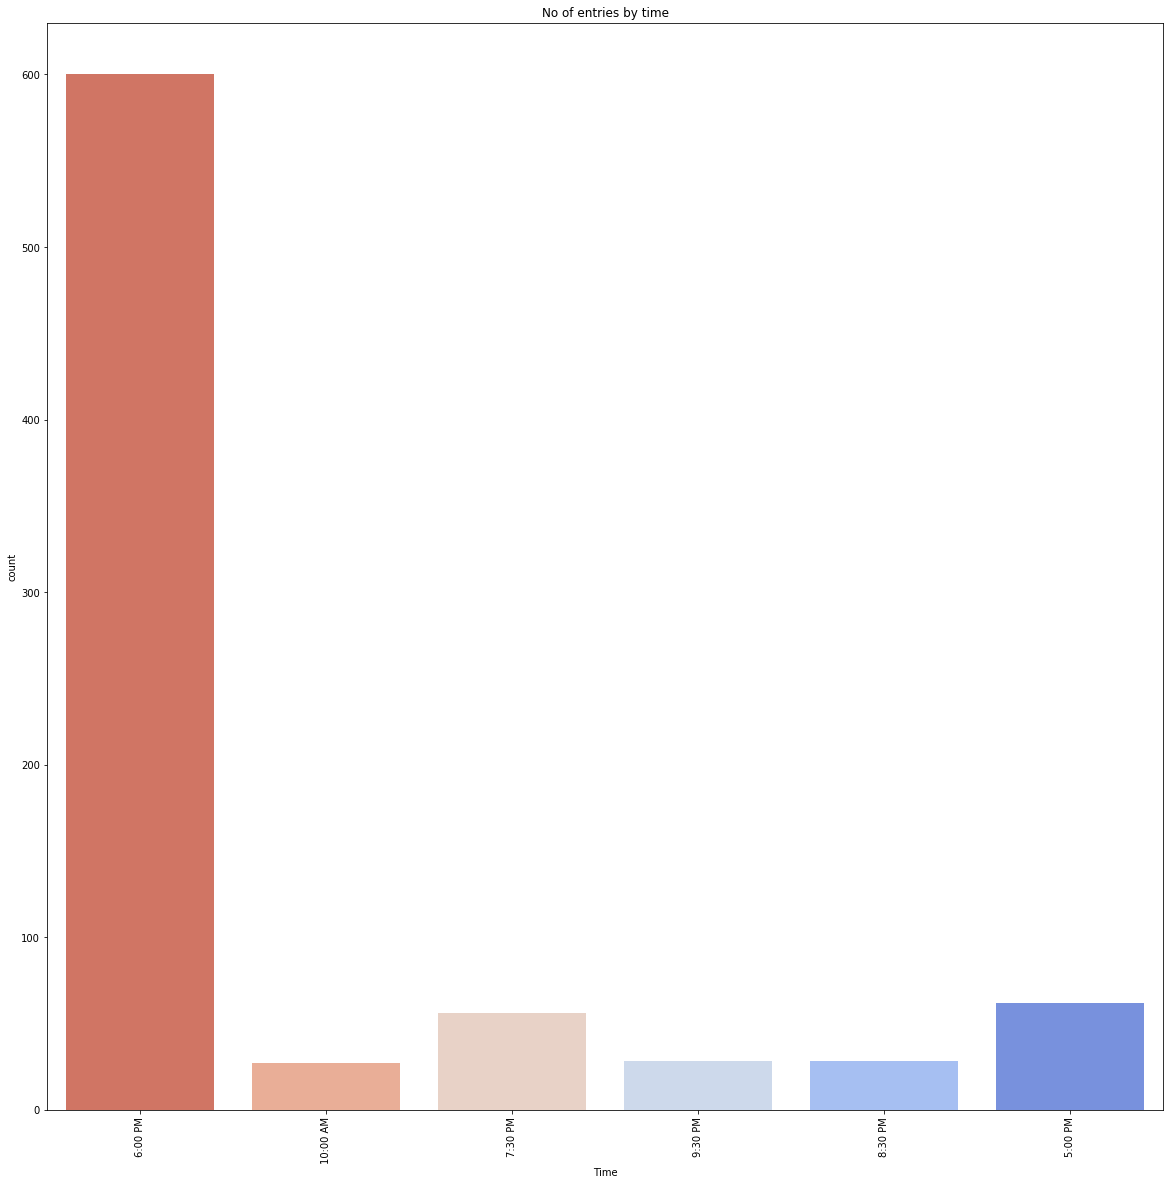

In [112]:
plt.figure(figsize=(20,20))
chart=sns.countplot(data=df, x="Time",palette="coolwarm_r")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title("No of entries by time")
plt.show()

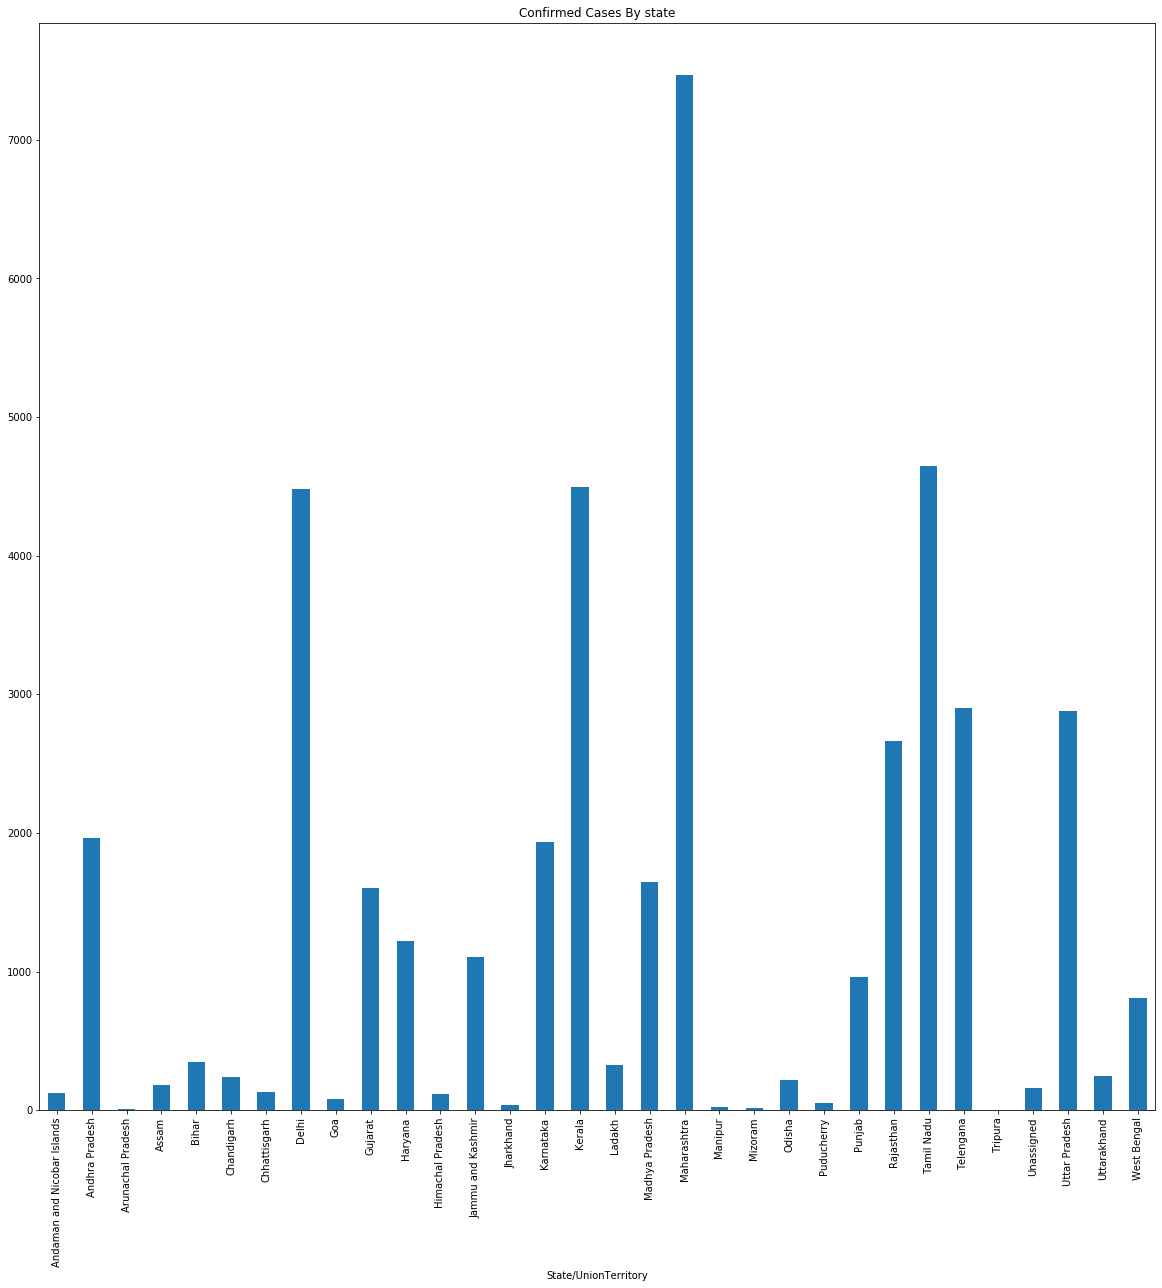

State/UnionTerritory
Andaman and Nicobar Islands     127.0
Andhra Pradesh                 1960.0
Arunachal Pradesh                 7.0
Assam                           179.0
Bihar                           350.0
Chandigarh                      237.0
Chhattisgarh                    132.0
Delhi                          4478.0
Goa                              82.0
Gujarat                        1605.0
Haryana                        1219.0
Himachal Pradesh                116.0
Jammu and Kashmir              1107.0
Jharkhand                        34.0
Karnataka                      1936.0
Kerala                         4493.0
Ladakh                          325.0
Madhya Pradesh                 1649.0
Maharashtra                    7468.0
Manipur                          24.0
Mizoram                          16.0
Odisha                          217.0
Puducherry                       55.0
Punjab                          957.0
Rajasthan                      2660.0
Tamil Nadu                   

In [113]:
dfx=df.copy()
chart=dfx.groupby('State/UnionTerritory').Confirmed.sum().plot(kind='bar',figsize=(20,20))
chart.set_title("Confirmed Cases By state")
plt.show()
dfx.groupby('State/UnionTerritory').Confirmed.sum()

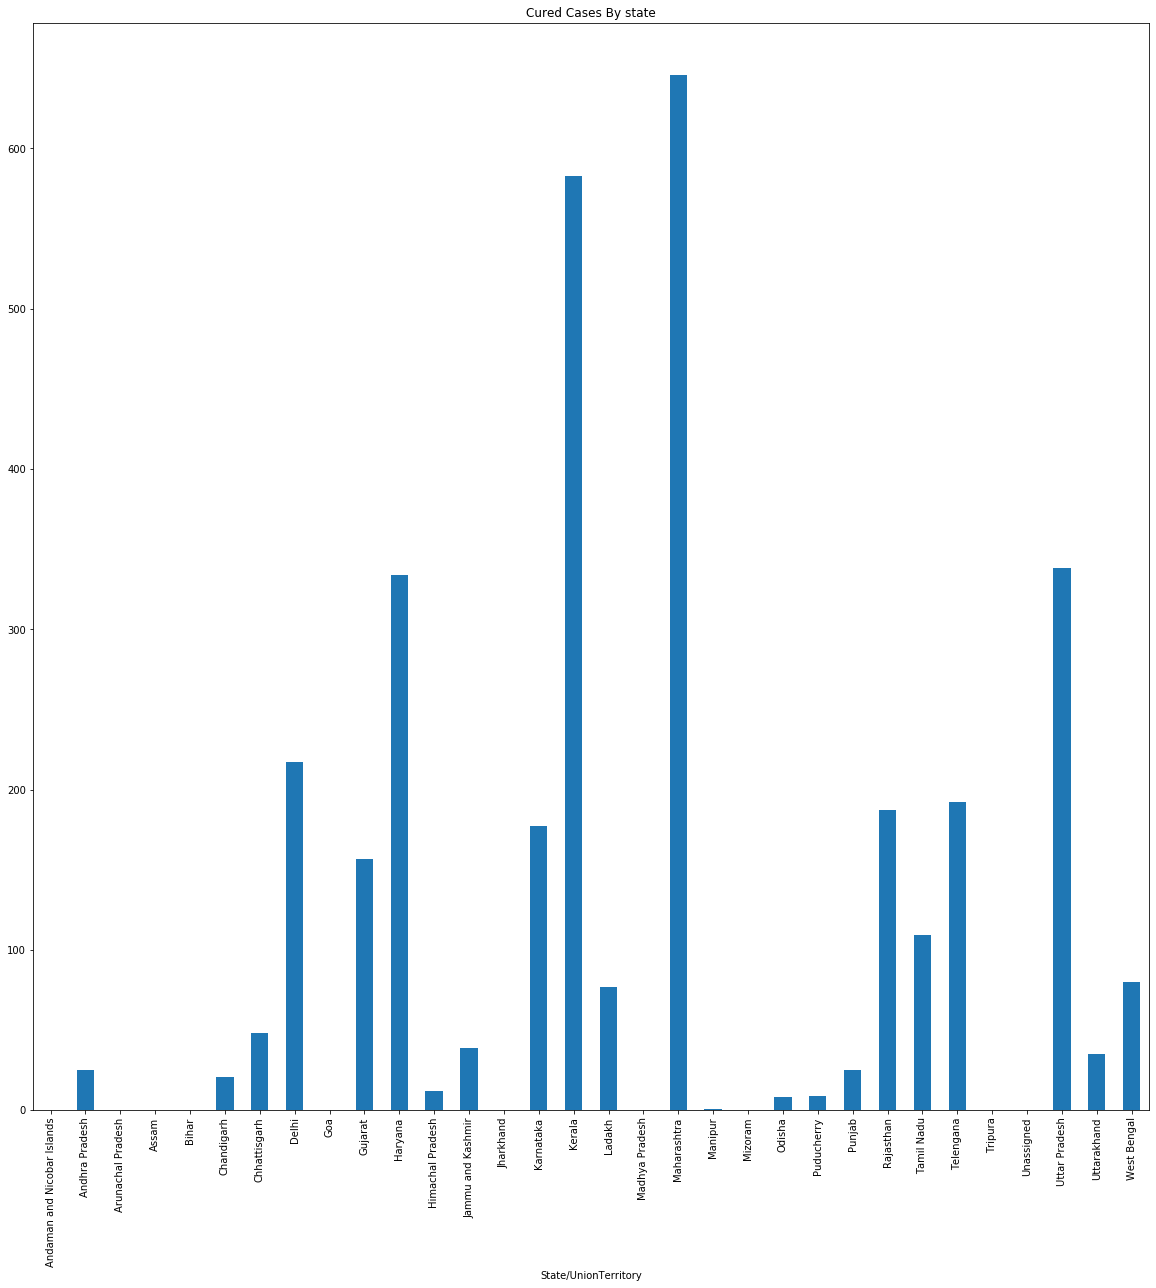

State/UnionTerritory
Andaman and Nicobar Islands      0.0
Andhra Pradesh                  25.0
Arunachal Pradesh                0.0
Assam                            0.0
Bihar                            0.0
Chandigarh                      21.0
Chhattisgarh                    48.0
Delhi                          217.0
Goa                              0.0
Gujarat                        157.0
Haryana                        334.0
Himachal Pradesh                12.0
Jammu and Kashmir               39.0
Jharkhand                        0.0
Karnataka                      177.0
Kerala                         583.0
Ladakh                          77.0
Madhya Pradesh                   0.0
Maharashtra                    646.0
Manipur                          1.0
Mizoram                          0.0
Odisha                           8.0
Puducherry                       9.0
Punjab                          25.0
Rajasthan                      187.0
Tamil Nadu                     109.0
Telengana        

In [114]:
chart=dfx.groupby('State/UnionTerritory').Cured.sum().plot(kind='bar',figsize=(20,20))
chart.set_title("Cured Cases By state")
plt.show()
dfx.groupby('State/UnionTerritory').Cured.sum()

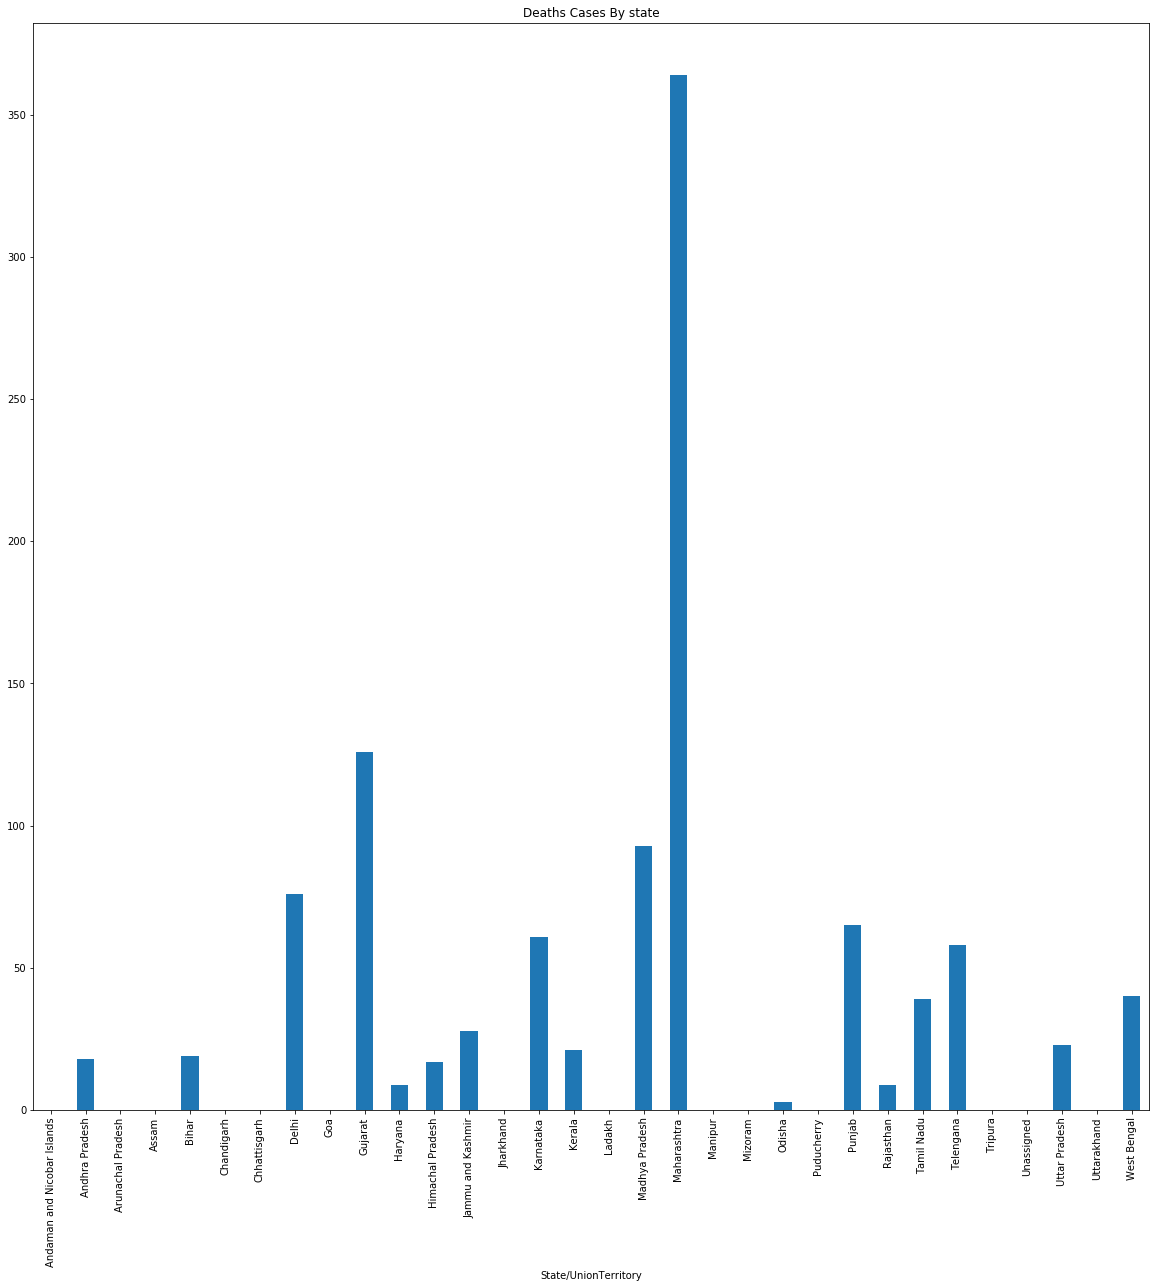

State/UnionTerritory
Andaman and Nicobar Islands      0.0
Andhra Pradesh                  18.0
Arunachal Pradesh                0.0
Assam                            0.0
Bihar                           19.0
Chandigarh                       0.0
Chhattisgarh                     0.0
Delhi                           76.0
Goa                              0.0
Gujarat                        126.0
Haryana                          9.0
Himachal Pradesh                17.0
Jammu and Kashmir               28.0
Jharkhand                        0.0
Karnataka                       61.0
Kerala                          21.0
Ladakh                           0.0
Madhya Pradesh                  93.0
Maharashtra                    364.0
Manipur                          0.0
Mizoram                          0.0
Odisha                           3.0
Puducherry                       0.0
Punjab                          65.0
Rajasthan                        9.0
Tamil Nadu                      39.0
Telengana        

In [115]:
chart=dfx.groupby('State/UnionTerritory').Deaths.sum().plot(kind='bar',figsize=(20,20))
chart.set_title("Deaths Cases By state")
plt.show()
dfx.groupby('State/UnionTerritory').Deaths.sum()

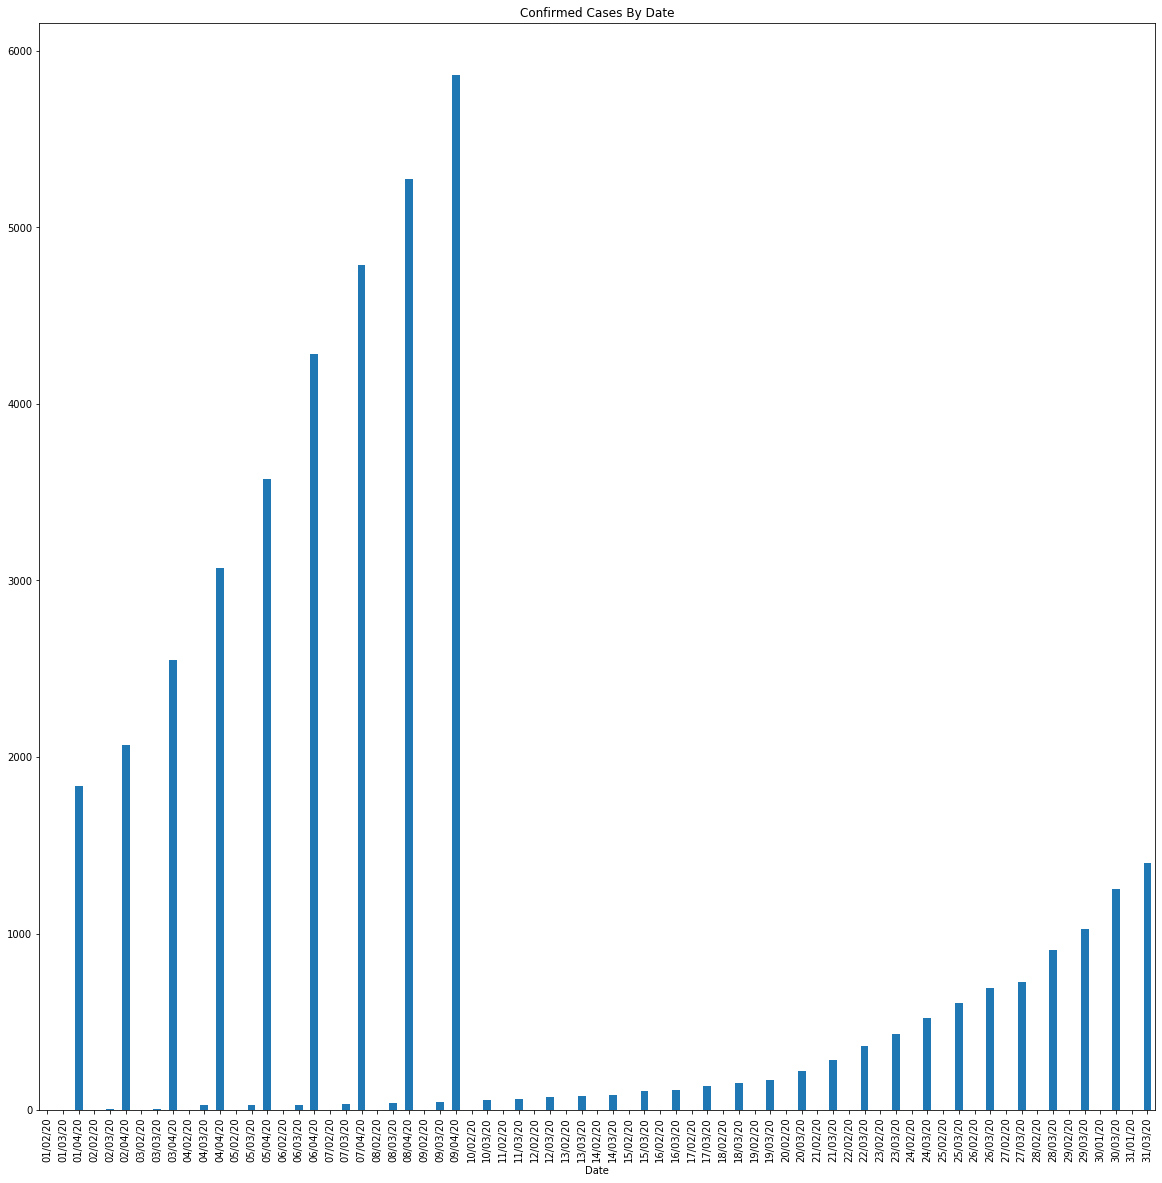

Date
01/02/20       2.0
01/03/20       3.0
01/04/20    1834.0
02/02/20       3.0
02/03/20       5.0
             ...  
29/03/20    1024.0
30/01/20       1.0
30/03/20    1251.0
31/01/20       1.0
31/03/20    1397.0
Name: Confirmed, Length: 71, dtype: float64

In [116]:
chart=dfx.groupby('Date').Confirmed.sum().plot(kind='bar',figsize=(20,20))
chart.set_title("Confirmed Cases By Date")
plt.show()
dfx.groupby('Date').Confirmed.sum()

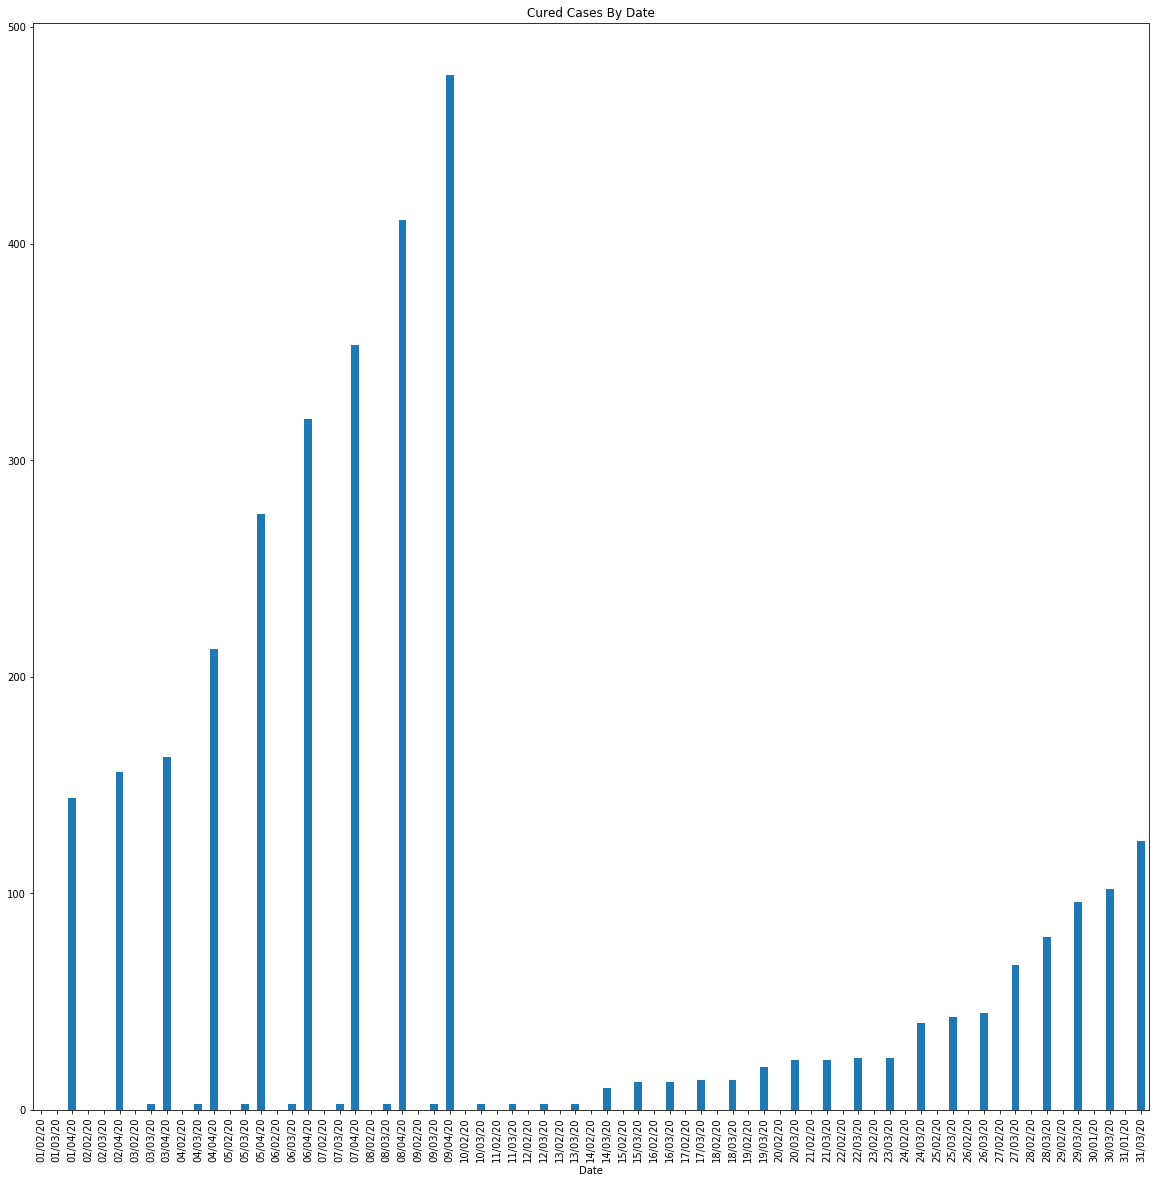

Date
01/02/20      0.0
01/03/20      0.0
01/04/20    144.0
02/02/20      0.0
02/03/20      0.0
            ...  
29/03/20     96.0
30/01/20      0.0
30/03/20    102.0
31/01/20      0.0
31/03/20    124.0
Name: Cured, Length: 71, dtype: float64

In [117]:
chart=dfx.groupby('Date').Cured.sum().plot(kind='bar',figsize=(20,20))
chart.set_title("Cured Cases By Date")
plt.show()
dfx.groupby('Date').Cured.sum()

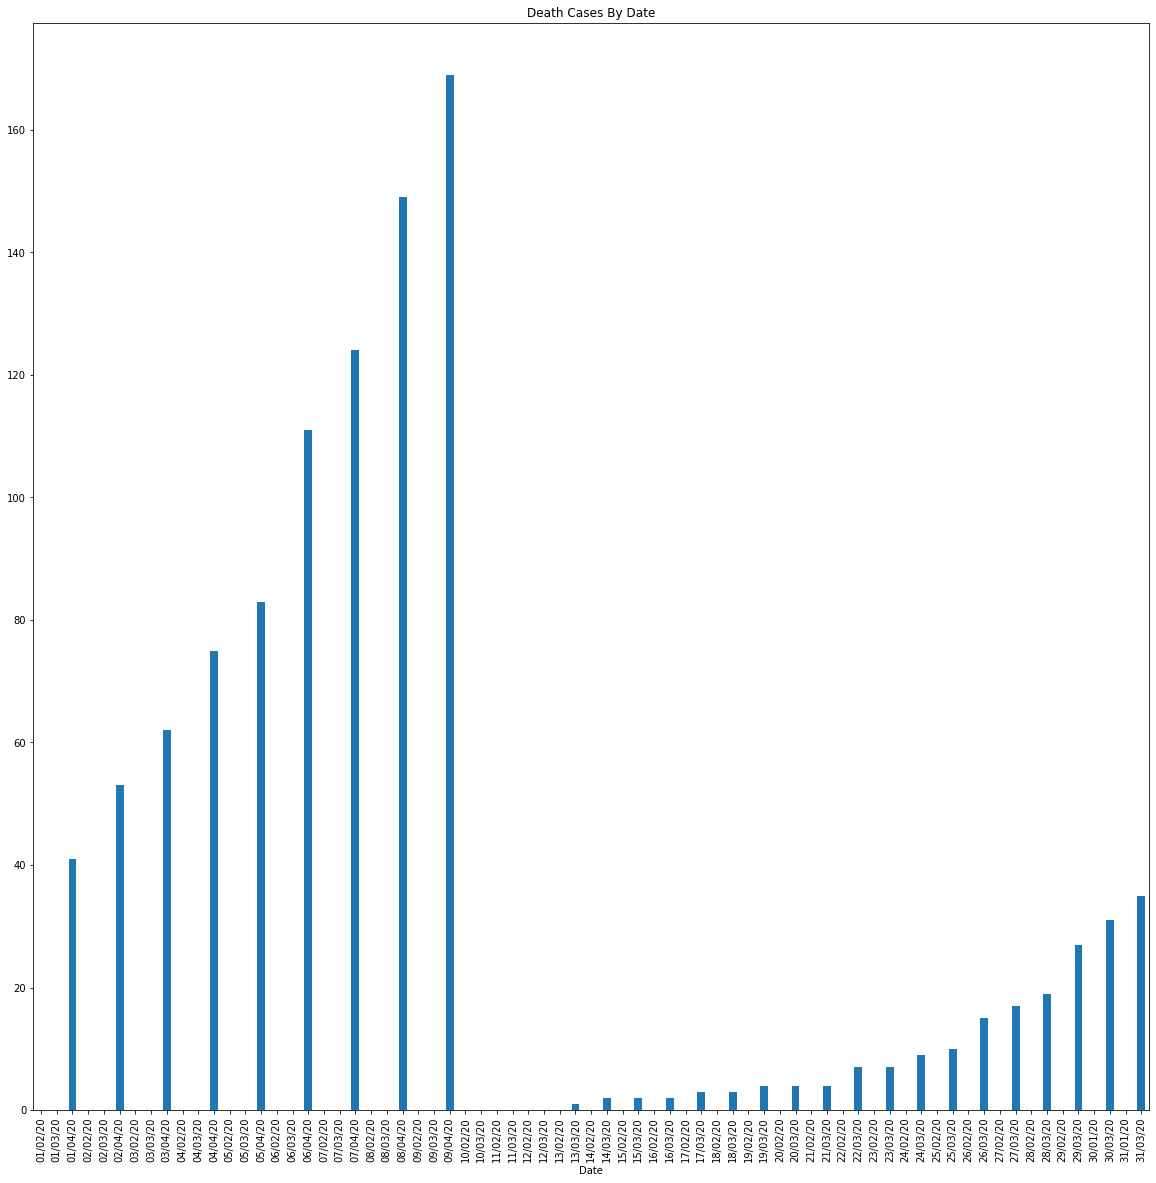

Date
01/02/20     0.0
01/03/20     0.0
01/04/20    41.0
02/02/20     0.0
02/03/20     0.0
            ... 
29/03/20    27.0
30/01/20     0.0
30/03/20    31.0
31/01/20     0.0
31/03/20    35.0
Name: Deaths, Length: 71, dtype: float64

In [118]:
chart=dfx.groupby('Date').Deaths.sum().plot(kind='bar',figsize=(20,20))
chart.set_title("Death Cases By Date")
plt.show()
dfx.groupby('Date').Deaths.sum()

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import skew
from sklearn.preprocessing import PolynomialFeatures

In [120]:
df = pd.read_csv('covid_19_india.csv')

In [121]:
df.drop([801,802,803,804,805], axis = 0, inplace = True)

In [122]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
796,797.0,09/04/20,5:00 PM,Telengana,-,-,35.0,7.0,442.0
797,798.0,09/04/20,5:00 PM,Tripura,-,-,0.0,0.0,1.0
798,799.0,09/04/20,5:00 PM,Uttarakhand,-,-,5.0,0.0,35.0
799,800.0,09/04/20,5:00 PM,Uttar Pradesh,-,-,31.0,4.0,410.0
800,801.0,09/04/20,5:00 PM,West Bengal,-,-,16.0,5.0,103.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       801 non-null    float64
 1   Date                      801 non-null    object 
 2   Time                      801 non-null    object 
 3   State/UnionTerritory      801 non-null    object 
 4   ConfirmedIndianNational   801 non-null    object 
 5   ConfirmedForeignNational  801 non-null    object 
 6   Cured                     801 non-null    float64
 7   Deaths                    801 non-null    float64
 8   Confirmed                 801 non-null    float64
dtypes: float64(4), object(5)
memory usage: 62.6+ KB


In [124]:
df['ConfirmedForeignNational'].unique()

array(['0', '1', '2', '14', '3', '9', '7', '11', '10', '8', '6', '-'],
      dtype=object)

In [125]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes('float64')

In [126]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        801 non-null    float64
 1   Cured      801 non-null    float64
 2   Deaths     801 non-null    float64
 3   Confirmed  801 non-null    float64
dtypes: float64(4)
memory usage: 31.3 KB


In [127]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      801 non-null    object
 1   Time                      801 non-null    object
 2   State/UnionTerritory      801 non-null    object
 3   ConfirmedIndianNational   801 non-null    object
 4   ConfirmedForeignNational  801 non-null    object
dtypes: object(5)
memory usage: 37.5+ KB


In [128]:
for col in df_num:
    df_num[col].fillna(df_num[col].mean, inplace = True)

In [129]:
for col in df_cat:
    df_cat[col].fillna(df_cat[col].mode()[0], inplace = True)

In [130]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      801 non-null    object
 1   Time                      801 non-null    object
 2   State/UnionTerritory      801 non-null    object
 3   ConfirmedIndianNational   801 non-null    object
 4   ConfirmedForeignNational  801 non-null    object
dtypes: object(5)
memory usage: 37.5+ KB


In [131]:
for data in df_cat:
    le = LabelEncoder() 
    df_cat[data] = le.fit_transform(df_cat[data] )

In [132]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Date                      801 non-null    int32
 1   Time                      801 non-null    int32
 2   State/UnionTerritory      801 non-null    int32
 3   ConfirmedIndianNational   801 non-null    int32
 4   ConfirmedForeignNational  801 non-null    int32
dtypes: int32(5)
memory usage: 21.9 KB


In [133]:
df_num = df.select_dtypes('float64')

In [134]:
for col in df_num:
    df_num[col].fillna(df_num[col].mean(), inplace =  True) 

Sno
Skew =  0.0


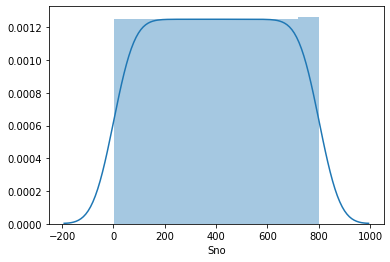

---------------------------------------------
Cured
Skew =  4.765421279783673


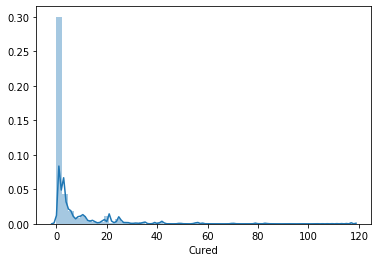

---------------------------------------------
Deaths
Skew =  9.683166046345153


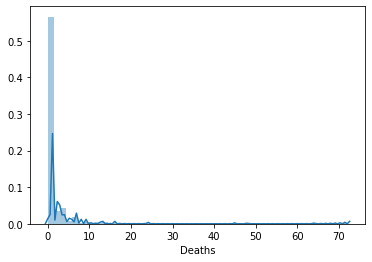

---------------------------------------------
Confirmed
Skew =  4.29043480382429


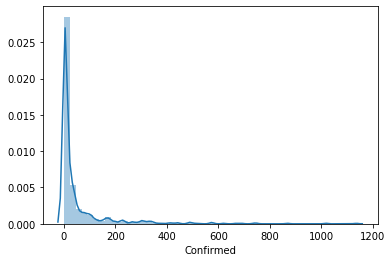

---------------------------------------------


In [135]:
for col in df_num:
    print(col)
    print("Skew = ", skew(df_num[col]))
    sns.distplot(df_num[col])
    plt.show()
    print("---------------------------------------------")

In [136]:
df_num['Deaths'] = np.cbrt(df_num['Deaths'])

In [137]:
print("Skew = ", skew(df_num['Deaths']))

Skew =  1.4522371340616518


In [138]:
df_num['Deaths'] = np.cbrt(df_num['Deaths'])

In [139]:
print("Skew = ", skew(df_num['Deaths']))

Skew =  0.7546617244032081


In [140]:
print("Skew = ", skew(df_num['Deaths']))

Skew =  0.7546617244032081


In [141]:
df_num['Deaths'] = np.cbrt(df_num['Deaths'])

In [142]:
print("Skew = ", skew(df_num['Deaths']))

Skew =  0.7010676150726116


In [143]:
print("Skew = ", skew(df_num['Cured']))

Skew =  4.765421279783673


In [144]:
df_num['Cured'] = np.log(df_num['Cured']+0.01)

In [145]:
print("Skew = ", skew(df_num['Cured']))

Skew =  0.4612824864924433


In [146]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        801 non-null    float64
 1   Cured      801 non-null    float64
 2   Deaths     801 non-null    float64
 3   Confirmed  801 non-null    float64
dtypes: float64(4)
memory usage: 31.3 KB


In [147]:
df_new = pd.concat([df_cat, df_num], axis=1)

In [148]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      801 non-null    int32  
 1   Time                      801 non-null    int32  
 2   State/UnionTerritory      801 non-null    int32  
 3   ConfirmedIndianNational   801 non-null    int32  
 4   ConfirmedForeignNational  801 non-null    int32  
 5   Sno                       801 non-null    float64
 6   Cured                     801 non-null    float64
 7   Deaths                    801 non-null    float64
 8   Confirmed                 801 non-null    float64
dtypes: float64(4), int32(5)
memory usage: 46.9 KB


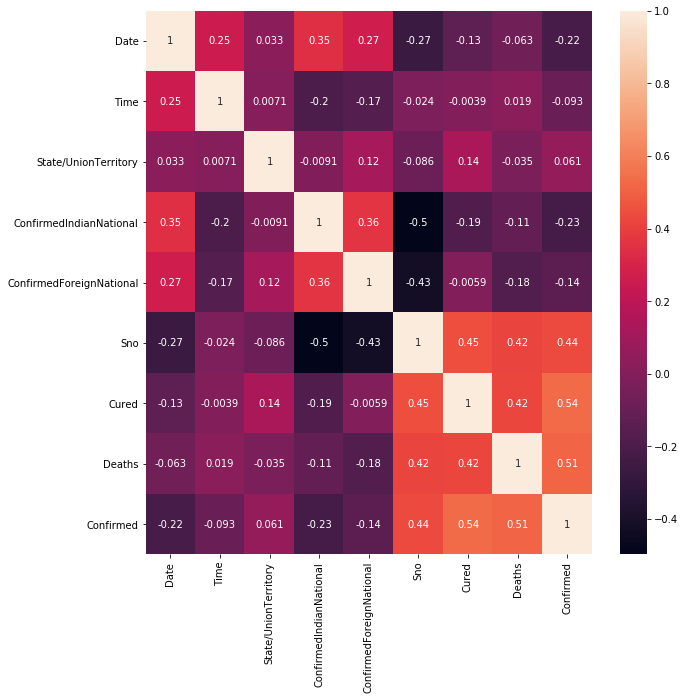

In [149]:
plt.figure(figsize = (10,10))
sns.heatmap(df_new.corr(), annot = True)
plt.show()

In [150]:
from scipy.stats import skew
print("skew = ", skew(df_new['Confirmed']))

skew =  4.29043480382429


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [152]:
# linear regression
x = df_new.drop('Confirmed', axis=1)
y = df_new['Confirmed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_hat = lr.predict(x_test)
print("R2 = ", r2_score(y_test, y_hat))

R2 =  0.44504312878949925


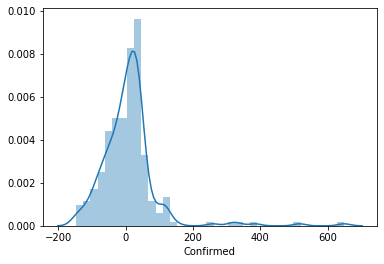

In [153]:
# residual distribution
residuals = y_test - y_hat
sns.distplot(residuals)
plt.show()

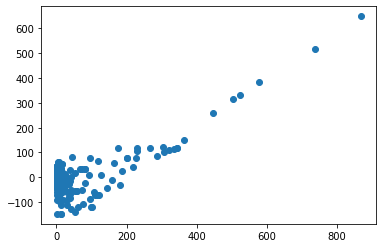

In [154]:
plt.scatter(y_test, residuals)
plt.show()

Slope =  [-5.61516925e-09  1.84911972e+00 -1.92072477e+01  1.46009062e+00
  4.77833023e-01 -2.87325018e+01 -1.63120158e-01  1.39518826e+01
 -1.86591330e+03 -1.76631447e-02 -2.43926691e-01  5.59601065e-03
 -1.27112183e-02  1.38037684e-01  3.80219112e-04  3.48214682e-02
  3.16284951e-01  1.24046473e+00 -2.76116679e-01  1.76883764e-01
  3.76842893e+00  5.81829494e-02 -2.19288514e+00 -1.17184154e+01
  1.82067399e-02 -7.90939253e-03  6.07162306e-02 -4.49693211e-04
  4.03468052e-01 -2.93981242e-01 -4.59178570e-03 -2.49110843e-02
  4.22103380e-04 -1.80062837e-02  5.42605462e-01  1.77919254e+00
  1.56553911e-02 -1.76379653e+00 -8.83167718e+00  1.23553349e-04
  7.01075084e-03  8.26182780e-02  5.11007626e+00  5.77905600e+00
  1.86934553e+03]
Intercept =  -29.686247223340082
R2 =  0.6993808800212777


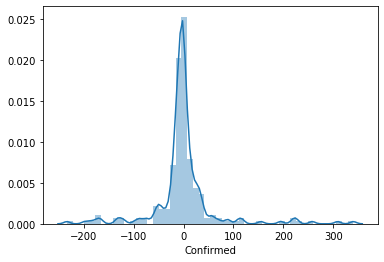

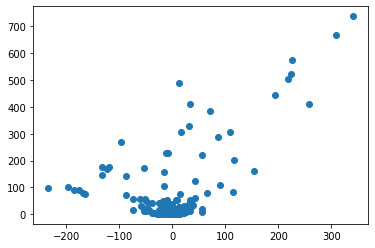

In [155]:
# polynomial regreesion on new df

pf = PolynomialFeatures(2)
x_poly = pf.fit_transform(x)

x_trn, x_tst, y_trn, y_tst = train_test_split(x_poly, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_trn, y_trn)

print("Slope = ", lr.coef_)
print("Intercept = ", lr.intercept_)

print("R2 = ", lr.score(x_tst, y_tst))
y_hat = lr.predict(x_tst)
residuals = y_tst - y_hat

sns.distplot(residuals)
plt.show()

plt.scatter(residuals, y_tst)
plt.show()

In [156]:

from sklearn.feature_selection import f_regression, SelectKBest

In [157]:
list = []
annova = SelectKBest(score_func = f_regression, k =5)
annova.fit(x,y)
list.append(annova.scores_)

In [158]:
scores_df = pd.DataFrame(x.columns, columns=['Column'])
scores_df['Scores'] = annova.scores_

In [159]:
scores_df.nlargest(5, 'Scores')

,Column,Scores
6,Cured,322.226018
7,Deaths,281.496808
5,Sno,188.020020
3,ConfirmedIndianNational,44.031631
0,Date,39.381813


In [160]:
list

[array([ 39.38181306,   6.92955792,   3.02602847,  44.03163127,
         15.5265446 , 188.02001965, 322.22601844, 281.49680847])]

In [161]:
x=df_new[['Cured','Deaths','Sno','ConfirmedIndianNational']]
y = df_new['Confirmed']

x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.3)



lr = LinearRegression()
lr.fit(x_trn, y_trn)
lr.score(x_tst, y_tst)

0.40004731713816644

In [162]:
from mlxtend.feature_selection import  SequentialFeatureSelector

In [163]:
x = df_new.drop('Confirmed', axis=1)
y = df_new['Confirmed']

In [164]:
sfs = SequentialFeatureSelector(LinearRegression(), k_features=4,scoring='r2',cv=3,n_jobs=3)
sfs.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=4, n_jobs=3, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

In [165]:
sfs.k_feature_names_

('Date', 'ConfirmedIndianNational', 'Cured', 'Deaths')

In [166]:
df_new.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Sno,Cured,Deaths,Confirmed
0,67,2,15,2,1,1.0,-4.60517,0.0,1.0
1,69,2,15,2,1,2.0,-4.60517,0.0,1.0
2,0,2,15,21,1,3.0,-4.60517,0.0,2.0
3,3,2,15,31,1,4.0,-4.60517,0.0,3.0
4,6,2,15,31,1,5.0,-4.60517,0.0,3.0


In [167]:
x = df_new.drop('Confirmed', axis=1)
y = df_new['Confirmed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [168]:
from sklearn.svm import LinearSVR
lsvm = LinearSVR() #Kernel = Linear, hard margin
lsvm.fit(x_train, y_train)
lsvm.score(x_test, y_test)

0.3657726464080157

In [169]:
from sklearn.tree import DecisionTreeRegressor #DTC - Classification / DTR - Regression
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.8779416637935759

In [170]:
from sklearn.ensemble import VotingRegressor
model_list = [('log reg', LinearRegression()),
              ('dt gini', DecisionTreeRegressor())
             ]

In [171]:
# Hard Voting
vc_hard = VotingRegressor(estimators=model_list)
vc_hard.fit(x_train, y_train)
vc_hard.score(x_test, y_test)

0.7984124682645445

In [321]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8770053445095943

In [330]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.24189103681776258

In [173]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=70, 
                            max_samples=100)
bagging.fit(x_train, y_train)
bagging.score(x_test, y_test)

0.4851543027405013

In [174]:
pasting = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=70,
                            max_samples=150, bootstrap=False)
pasting.fit(x_train, y_train)
pasting.score(x_test, y_test)

0.8304472857253025

In [175]:
df_new.tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Sno,Cured,Deaths,Confirmed
796,26,1,26,0,0,797.0,3.555634,1.074731,442.0
797,26,1,27,0,0,798.0,-4.605170,0.000000,1.0
798,26,1,30,0,0,799.0,1.611436,0.000000,35.0
799,26,1,29,0,0,800.0,3.434310,1.052685,410.0
800,26,1,31,0,0,801.0,2.773214,1.061421,103.0


In [176]:
df_new['active cases'] = df_new['Confirmed'] - df_new['Cured'] - df_new['Deaths']

In [177]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      801 non-null    int32  
 1   Time                      801 non-null    int32  
 2   State/UnionTerritory      801 non-null    int32  
 3   ConfirmedIndianNational   801 non-null    int32  
 4   ConfirmedForeignNational  801 non-null    int32  
 5   Sno                       801 non-null    float64
 6   Cured                     801 non-null    float64
 7   Deaths                    801 non-null    float64
 8   Confirmed                 801 non-null    float64
 9   active cases              801 non-null    float64
dtypes: float64(5), int32(5)
memory usage: 53.2 KB


In [325]:
df1 = df.groupby('Date')['Confirmed','Cured','Deaths'].sum().sort_values(by = 'Confirmed',ascending = True)

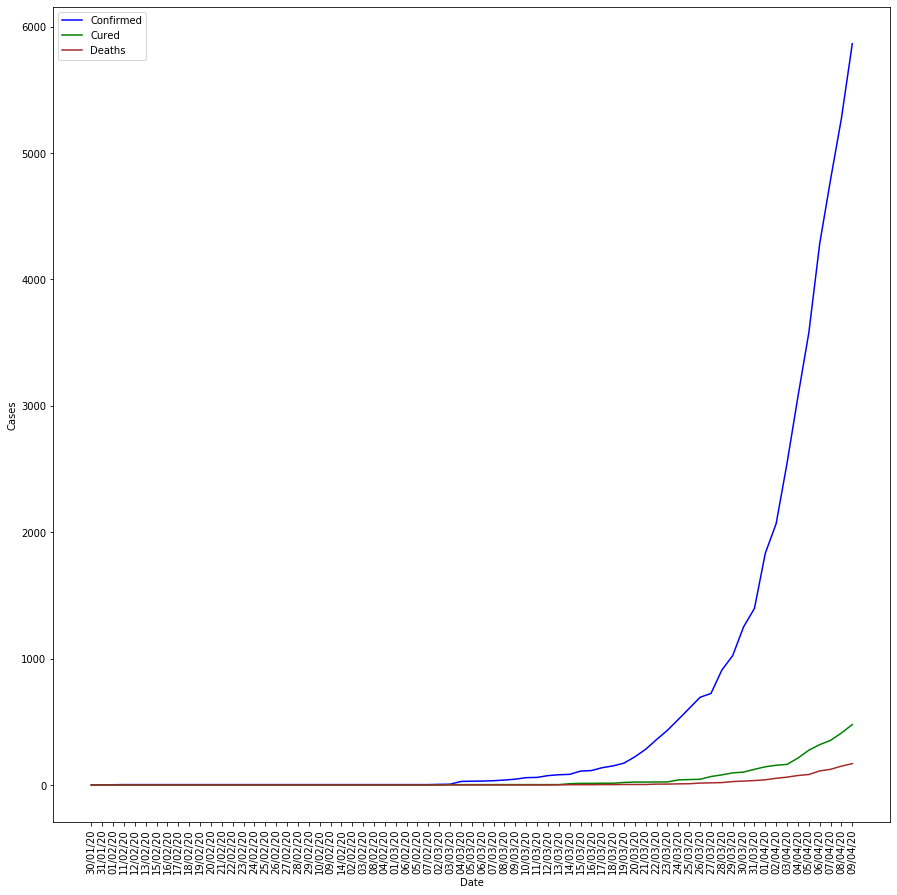

In [326]:
plt.figure(figsize = (15,15))
plt.plot(df1['Confirmed'],label = "Confirmed", color = 'Blue')
plt.plot(df1['Cured'], label = "Cured", color = 'Green')
plt.plot(df1['Deaths'], label = "Deaths", color = 'Brown')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend()
plt.ylabel('Cases')
plt.show()

In [180]:
df1 = df.copy()

In [181]:
df1.drop(['Sno','Time','State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'], axis =1, inplace = True)

In [182]:
df1.head()

,Date,Confirmed
0,30/01/20,1.0
1,31/01/20,1.0
2,01/02/20,2.0
3,02/02/20,3.0
4,03/02/20,3.0


In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       801 non-null    object 
 1   Confirmed  801 non-null    float64
dtypes: float64(1), object(1)
memory usage: 18.8+ KB


In [186]:
df1.tail()

,Date,Confirmed
796,09/04/20,442.0
797,09/04/20,1.0
798,09/04/20,35.0
799,09/04/20,410.0
800,09/04/20,103.0


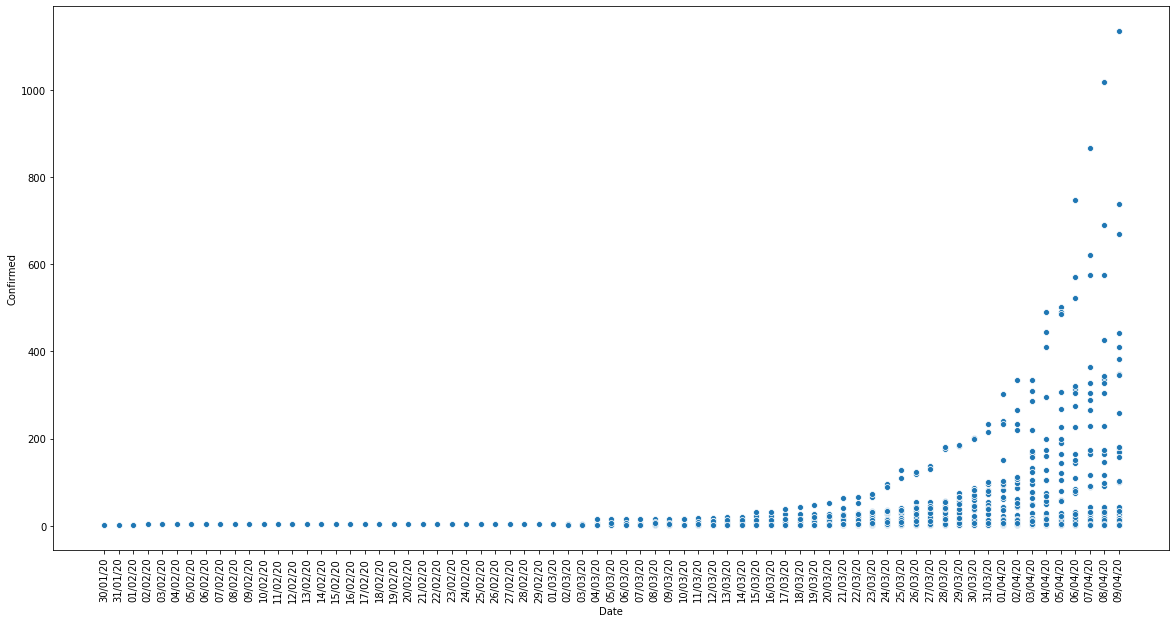

In [187]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = df, x=df1['Date'], y = df1['Confirmed'])
plt.xticks(rotation = 90)
plt.show()

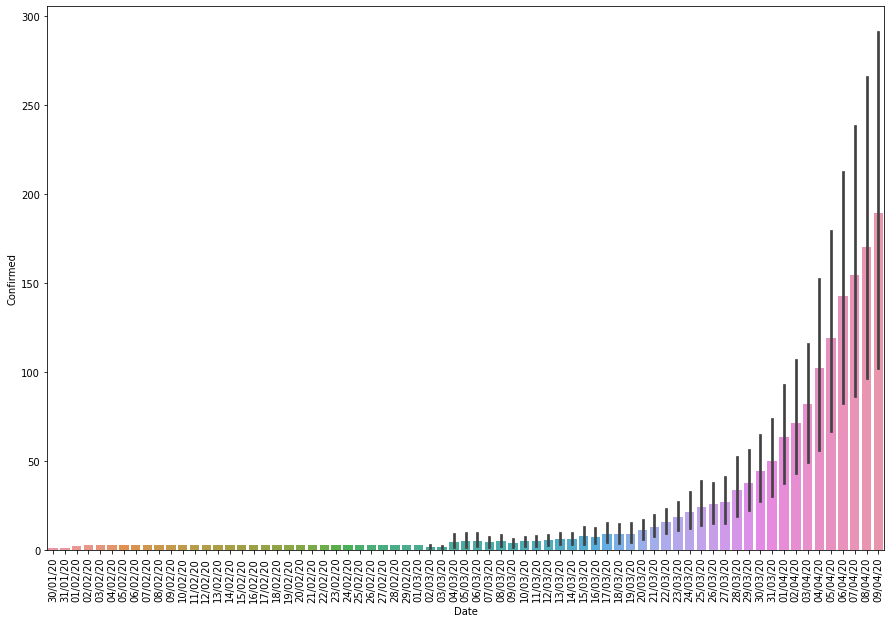

In [188]:
plt.figure(figsize = (15,10))
sns.barplot(data = df1, x= df1['Date'], y = df1['Confirmed'])
plt.xticks(rotation = 90)
plt.show()

In [189]:
df_new.tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Sno,Cured,Deaths,Confirmed,active cases
796,26,1,26,0,0,797.0,3.555634,1.074731,442.0,437.369635
797,26,1,27,0,0,798.0,-4.605170,0.000000,1.0,5.605170
798,26,1,30,0,0,799.0,1.611436,0.000000,35.0,33.388564
799,26,1,29,0,0,800.0,3.434310,1.052685,410.0,405.513005
800,26,1,31,0,0,801.0,2.773214,1.061421,103.0,99.165365


In [190]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       801 non-null    object 
 1   Confirmed  801 non-null    float64
dtypes: float64(1), object(1)
memory usage: 58.8+ KB


In [191]:
for col in df1:
    lb = LabelEncoder()
    df1[col] = lb.fit_transform(df1[col])

In [192]:
df1.head()

,Date,Confirmed
0,67,0
1,69,0
2,0,1
3,3,2
4,6,2


In [314]:
from xgboost import XGBRegressor

In [315]:
xgb = XGBRegressor()
xgb.fit(x_tr, y_tr)
xgb.score(x_ts, y_ts)

0.23530505358805298

In [197]:
df2 = pd.DataFrame(columns=["Date_pred","Confirmed_pred"])

In [198]:
total_days = np.arange(92).reshape(-1,1)

In [199]:
days_given = np.arange(71).reshape(-1,1)

In [200]:
Days = np.arange(1, len(df['Date'])+1)

In [202]:
conf = np.array(df['Confirmed']).reshape(-1,1)

In [203]:
x_trn, x_tst, y_trn, y_tst = train_test_split(Days.reshape(-1,1), conf, test_size = 0.3)

In [204]:
rf.fit(x_trn, y_trn)
rf.score(x_tst, y_tst)`

-0.012522694459723427

In [270]:
dates = pd.DataFrame({'Date' : pd.date_range(start = '04-10-2020', end = '05-01-2020')})

In [278]:
temp_df = df.groupby('Date')['Confirmed'].agg('sum').to_frame().reset_index()

In [279]:
x = temp_df['Date']
y = temp_df['Confirmed']
Days = np.arange(1, len(temp_df)+1)

In [308]:
poly_features = PolynomialFeatures(degree=4)

In [309]:
poly_Days = pf.fit_transform(Days.reshape(-1, 1))

In [310]:
#polynomial regression for prediction
lr.fit(poly_Days, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [311]:
lr.score(poly_Days,y)

0.04040522226183696

In [312]:
y_predicted = lr.predict(poly_Days)

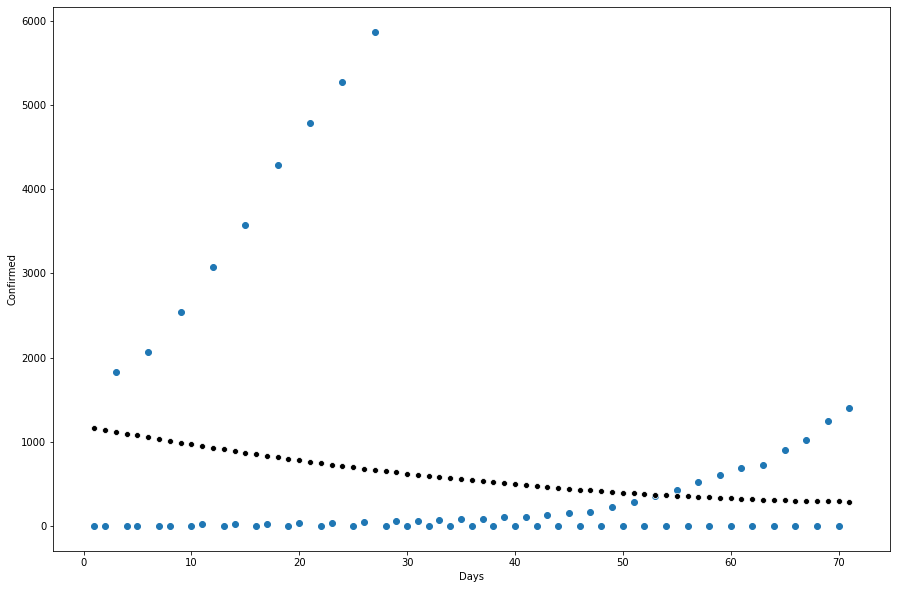

In [313]:

plt.figure(figsize=(15, 10))
plt.scatter(Days,y)

sns.scatterplot(x=Days, y = y_predicted , color='Black')
plt.xlabel('Days')
plt.ylabel('Confirmed')

plt.show()

In [295]:
# random forest regressor for prediction
rf.fit(poly_Days,y)
rf.score(poly_Days,y)

0.7684089963169265

In [296]:
y_predicted_rf = rf.predict(poly_Days)

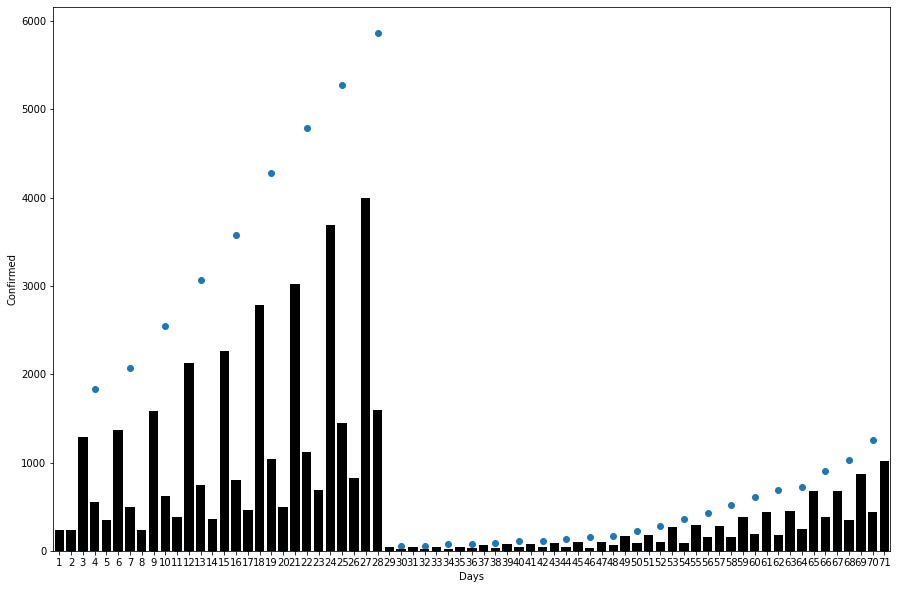

In [306]:
plt.figure(figsize=(15, 10))
plt.scatter(Days,y)

sns.barplot(x=Days, y = y_predicted_rf , color='Black')
plt.xlabel('Days')
plt.ylabel('Confirmed')

plt.show()

In [327]:
# decision tree for prediction
dt.fit(poly_Days,y)
dt.score(poly_Days,y)
y_predicted_dt = dt.predict(poly_Days)

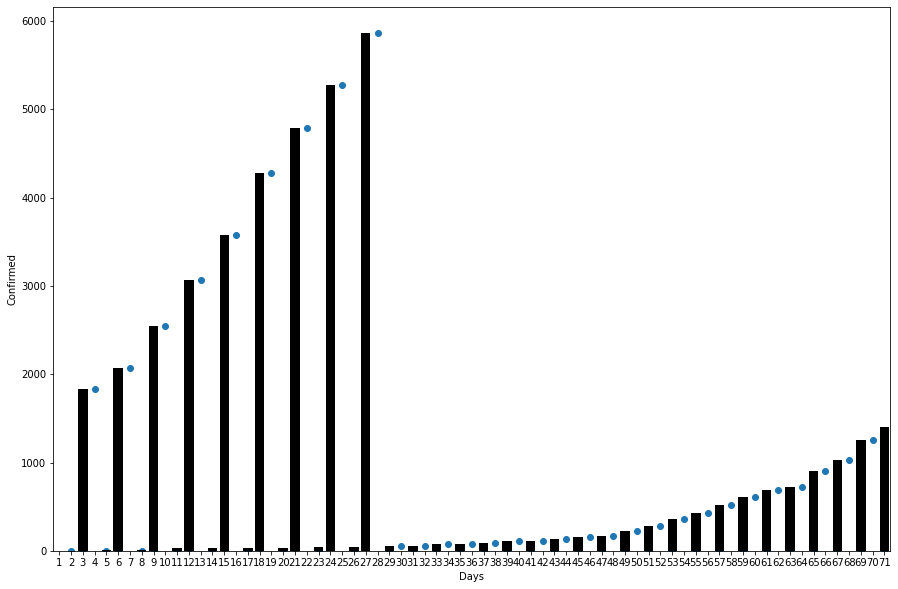

In [305]:
plt.figure(figsize=(15, 10))
plt.scatter(Days,y)

sns.barplot(x=Days, y = y_predicted_dt , color='Black')
plt.xlabel('Days')
plt.ylabel('Confirmed')

plt.show()

In [316]:
# XGBoost for prediction
xgb.fit(poly_Days,y)
xgb.score(poly_Days,y)
y_predicted_xgb = dt.predict(poly_Days)

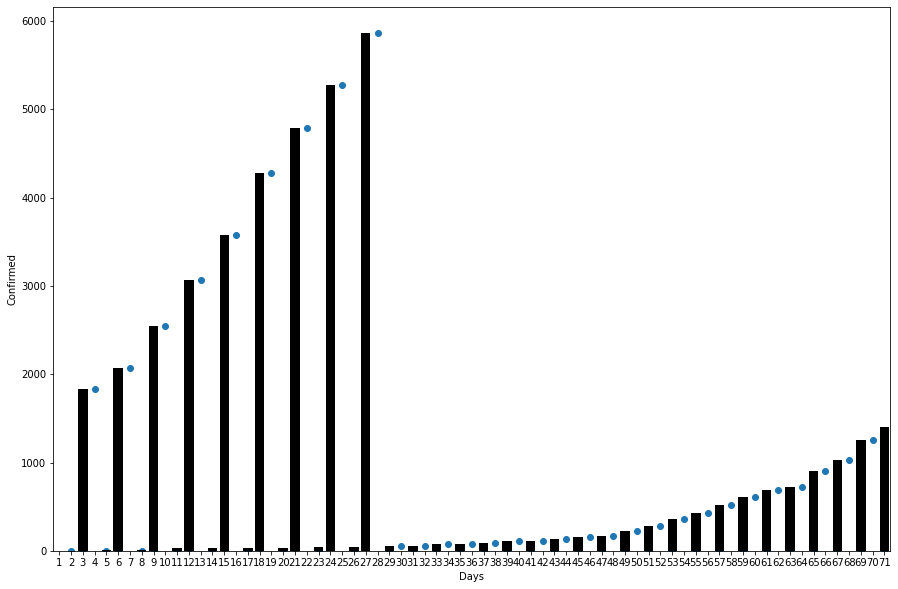

In [317]:
plt.figure(figsize=(15, 10))
plt.scatter(Days,y)

sns.barplot(x=Days, y = y_predicted_xgb , color='Black')
plt.xlabel('Days')
plt.ylabel('Confirmed')

plt.show()

In [ ]:
#Conclusion

# Decision tree & XGBoost performs good as compared to random forest regresson for prediction of cases
# Target value i.e Confirmed shows a highly exponential growth after March end
# Independent variables "Cured" & "Deaths" were skewed. Had to reduce their skewness
# 